In [1]:
import numpy as np
import os

In [2]:
data_dir = '../data'
output_dir = '../outputs'
full_embeddings = np.array([])
for filename in os.listdir(output_dir):
    file = os.path.join(output_dir, filename)
    if os.path.isfile(file):
        np_file = np.load(file)
        if len(full_embeddings) == 0:
            full_embeddings = np_file
        else:
            full_embeddings = np.dstack((full_embeddings, np_file))
        # print(full_embeddings)

full_embeddings

array([[[-12.85767637,  -4.145978  ,   8.26409951, ...,   8.26409951,
           7.66680461, -10.31440739],
        [  5.80114418, -10.33185601,  -8.05672145, ...,  -8.05672145,
          -3.23771763,  -2.1354261 ],
        [ -2.89601182,  -9.13365304,   6.29723432, ...,   6.29723432,
         -11.7514804 ,   9.8190099 ]],

       [[  1.80445771, -12.01870892,   8.63117318, ...,   8.63117318,
          -2.14564331,  12.04427081],
        [  3.40501136,  -2.20032593, -11.27394979, ..., -11.27394979,
         -13.81631076,  -6.50663821],
        [ 13.87479117,  -7.62031506,   2.40018867, ...,   2.40018867,
          -3.44467294,  -4.46757203]],

       [[ -1.40824676,  -7.41937096,   6.50756823, ...,   6.50756823,
           3.11050994, -12.88497155],
        [  8.43838496, -12.33504274, -12.59469231, ..., -12.59469231,
          12.1530453 ,  -3.3401753 ],
        [ 11.58319905,   0.39956879,  -2.52691142, ...,  -2.52691142,
           7.07023464,  -5.49369976]],

       ...,

       [[

In [3]:
full_embeddings.shape

(1854, 3, 500)

In [6]:
# load original 1854*49 embeddings
original_embeddings = np.loadtxt(os.path.join(data_dir, 'spose_embedding_49d_sorted.txt'))
original_embeddings.shape

(1854, 49)

In [7]:
# load categories 
import pandas as pd

cat_mapping = pd.read_csv(os.path.join(data_dir, 'THINGS_Table.csv'))
cat_mapping

image_nr        image_name                         file_path        cr  \
0             1  aardvark_01b.jpg  images/aardvark/aardvark_01b.jpg  0.825000   
1             2  aardvark_02s.jpg  images/aardvark/aardvark_02s.jpg  0.800000   
2             3  aardvark_03s.jpg  images/aardvark/aardvark_03s.jpg  0.878049   
3             4  aardvark_04s.jpg  images/aardvark/aardvark_04s.jpg  0.731707   
4             5  aardvark_05s.jpg  images/aardvark/aardvark_05s.jpg  0.825000   
...         ...               ...                               ...       ...   
26102     26103  zucchini_09s.jpg  images/zucchini/zucchini_09s.jpg  0.809524   
26103     26104  zucchini_10s.jpg  images/zucchini/zucchini_10s.jpg  0.790698   
26104     26105  zucchini_11s.jpg  images/zucchini/zucchini_11s.jpg  0.772727   
26105     26106  zucchini_12s.jpg  images/zucchini/zucchini_12s.jpg  0.846154   
26106     26107  zucchini_13s.jpg  images/zucchini/zucchini_13s.jpg  0.731707   

       smallcat  exemplar_num  bigcat    L1_Typ    L2_Typ    L3_Typ  ...  \
0             1             1       1  0.111299  0.020032  0.114910  ...   
1             1             2       1  0.101724  0.020289  0.133928  ...   
2             1             3       1  0.080297  0.026367  0.102246  ...   
3             1             4       1  0.077235  0.023719  0.121103  ...   
4             1             5       1  0.024315  0.008199  0.118279  ...   
...         ...           ...     ...       ...       ...       ...  ...   
26102      1854             9      10  0.036079  0.049216  0.118266  ...   
26103      1854            10      10  0.090200  0.067948  0.172442  ...   
26104      1854            11      10  0.051265  0.066226  0.159599  ...   
26105      1854            12      10  0.008061  0.029344  0.143838  ...   
26106      1854            13      10  0.008926  0.057539  0.180061  ...   

         dim_40    dim_41    dim_42    dim_43    dim_44    dim_45    dim_46  \
0      0.000000  0.087269  0.030106  0.000000  0.071850  0.193742  0.001318   
1      0.000000  0.071756  0.021225  0.032112  0.110941  0.221618  0.000000   
2      0.035888  0.271671  0.061739  0.005007  0.133390  0.270545  0.092282   
3      0.017375  0.059174  0.021306  0.000000  0.028998  0.143773  0.000000   
4      0.114017  0.104627  0.046711  0.007543  0.015217  0.095385  0.121823   
...         ...       ...       ...       ...       ...       ...       ...   
26102  0.138692  0.038854  0.001301  0.035156  0.026822  0.041146  0.012236   
26103  0.082716  0.000000  0.000000  0.013342  0.050693  0.013523  0.010016   
26104  0.102723  0.000000  0.111682  0.017875  0.005707  0.102623  0.066692   
26105  0.137626  0.000000  0.000000  0.015710  0.038510  0.006002  0.000000   
26106  0.073770  0.114309  0.064336  0.033637  0.077807  0.080569  0.036055   

         dim_47    dim_48    dim_49  
0      0.000000  0.000000  0.028157  
1      0.000000  0.000000  0.039948  
2      0.001476  0.000000  0.012232  
3      0.000000  0.003003  0.016012  
4      0.000000  0.030336  0.031415  
...         ...       ...       ...  
26102  0.000000  0.011280  0.025806  
26103  0.000000  0.000000  0.019528  
26104  0.000000  0.014834  0.000000  
26105  0.000000  0.000000  0.016610  
26106  0.000000  0.000000  0.037821  

[26107 rows x 78 columns]

In [8]:
# load memorability scores by concepts

memorability = pd.read_csv(os.path.join(data_dir, 'THINGS_Memorability_Scores.csv'))
memorability

image_nr        image_name                         file_path        cr
0             1  aardvark_01b.jpg  images/aardvark/aardvark_01b.jpg  0.825000
1             2  aardvark_02s.jpg  images/aardvark/aardvark_02s.jpg  0.800000
2             3  aardvark_03s.jpg  images/aardvark/aardvark_03s.jpg  0.878049
3             4  aardvark_04s.jpg  images/aardvark/aardvark_04s.jpg  0.731707
4             5  aardvark_05s.jpg  images/aardvark/aardvark_05s.jpg  0.825000
...         ...               ...                               ...       ...
26102     26103  zucchini_09s.jpg  images/zucchini/zucchini_09s.jpg  0.809524
26103     26104  zucchini_10s.jpg  images/zucchini/zucchini_10s.jpg  0.790698
26104     26105  zucchini_11s.jpg  images/zucchini/zucchini_11s.jpg  0.772727
26105     26106  zucchini_12s.jpg  images/zucchini/zucchini_12s.jpg  0.846154
26106     26107  zucchini_13s.jpg  images/zucchini/zucchini_13s.jpg  0.731707

[26107 rows x 4 columns]

In [9]:
cat_concept_mapping = memorability.merge(cat_mapping[['image_name', 'smallcat', 'bigcat']], how='left', on = 'image_name')
cat_concept_mem = cat_concept_mapping[['cr', 'smallcat', 'bigcat']].groupby('smallcat').mean()
cat_concept_mem['bigcat'] = cat_concept_mem['bigcat'].astype(int).replace(0, 99)
cat_concept_mem


cr  bigcat
smallcat                  
1         0.779739       1
2         0.798485      13
3         0.752845      18
4         0.761851      99
5         0.794466       9
...            ...     ...
1850      0.722655      99
1851      0.843158      10
1852      0.800163       1
1853      0.797468      99
1854      0.823237      10

[1854 rows x 2 columns]

In [10]:
### load category names
from scipy.io import loadmat

cat = loadmat(os.path.join(data_dir,'categories.mat'))
cat_names = [item[0] for item in cat['categories'][0]]
cat_names.append('na')
cat_names = pd.DataFrame(cat_names, columns=['cat_name']).reset_index()
cat_names['index'] = cat_names['index']+1
cat_names.iloc[27] = [99, np.nan]
cat_names

index            cat_name
0       1              animal
1       2                bird
2       3           body part
3       4            clothing
4       5  clothing accessory
5       6           container
6       7             dessert
7       8               drink
8       9   electronic device
9      10                food
10     11               fruit
11     12           furniture
12     13          home decor
13     14              insect
14     15   kitchen appliance
15     16        kitchen tool
16     17   medical equipment
17     18  musical instrument
18     19       office supply
19     20         part of car
20     21               plant
21     22    sports equipment
22     23                tool
23     24                 toy
24     25           vegetable
25     26             vehicle
26     27              weapon
27     99                 NaN

In [11]:
cat_concept_mem = cat_concept_mem.merge(cat_names, how='left', left_on='bigcat', right_on='index').drop(columns=['index'])
cat_concept_mem


cr  bigcat            cat_name
0     0.779739       1              animal
1     0.798485      13          home decor
2     0.752845      18  musical instrument
3     0.761851      99                 NaN
4     0.794466       9   electronic device
...        ...     ...                 ...
1849  0.722655      99                 NaN
1850  0.843158      10                food
1851  0.800163       1              animal
1852  0.797468      99                 NaN
1853  0.823237      10                food

[1854 rows x 3 columns]

In [12]:
### load feature names
features = loadmat(os.path.join(data_dir, 'labels.mat'))
feat_name = [item[0][0] for item in features['labels']]
feat_name

['made of metal / artificial / hard',
 'food-related / eating-related / kitchen-related',
 'animal-related / organic',
 'clothing-related / fabric / covering',
 'furniture-related / household-related / artifact',
 'plant-related / green',
 'outdoors-related',
 'transportation / motorized / dynamic',
 'wood-related / brownish',
 'body part-related',
 'colorful',
 'valuable / special occasion-related',
 'electronic / technology',
 'sport-related / recreational activity-related',
 'disc-shaped / round',
 'tool-related',
 'many small things / course pattern',
 'paper-related / thin / flat / text-related',
 'fluid-related / drink-related',
 'long / thin',
 'water-related / blue',
 'powdery / fine-scale pattern',
 'red',
 'feminine (stereotypically) / decorative',
 'bathroom-related / sanitary',
 'black / noble',
 'weapon / danger-related / violence',
 'musical instrument-related / noise-related',
 'sky-related / flying-related / floating-related',
 'spherical / ellipsoid / rounded / volumin

In [13]:
feat_short = loadmat(os.path.join(data_dir, 'labels_short.mat'))
feat_short_names = [item[0] for item in feat_short['labels_short'][0]]
# feat_short_names

In [75]:
similarity_mat = loadmat(os.path.join(data_dir, 'spose_similarity.mat'))['spose_sim']
similarity_mat

array([[1.        , 0.08223886, 0.10220934, ..., 0.95029233, 0.07977875,
        0.3494733 ],
       [0.08223886, 1.        , 0.69418005, ..., 0.12006224, 0.59181441,
        0.13672659],
       [0.10220934, 0.69418005, 1.        , ..., 0.19313993, 0.48374209,
        0.09237879],
       ...,
       [0.95029233, 0.12006224, 0.19313993, ..., 1.        , 0.10901922,
        0.28037564],
       [0.07977875, 0.59181441, 0.48374209, ..., 0.10901922, 1.        ,
        0.08761288],
       [0.3494733 , 0.13672659, 0.09237879, ..., 0.28037564, 0.08761288,
        1.        ]])

In [91]:
cat_typicality = loadmat(os.path.join(data_dir, 'typicality_data27.mat'))
cat_typicality

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan 17 16:09:02 2020',
 '__version__': '1.0',
 '__globals__': [],
 'best_match27': array([[ 3., nan, 10.,  4., nan, 44., nan, 19., 13.,  2., nan,  5., nan,
         35., nan, nan, 46., 28., nan, nan,  6., 14., 16., 45., nan,  8.,
         27.]]),
 'categories27': array([[array(['animal'], dtype='<U6'), array(['bird'], dtype='<U4'),
         array(['body part'], dtype='<U9'),
         array(['clothing'], dtype='<U8'),
         array(['clothing accessory'], dtype='<U18'),
         array(['container'], dtype='<U9'),
         array(['dessert'], dtype='<U7'), array(['drink'], dtype='<U5'),
         array(['electronic device'], dtype='<U17'),
         array(['food'], dtype='<U4'), array(['fruit'], dtype='<U5'),
         array(['furniture'], dtype='<U9'),
         array(['home decor'], dtype='<U10'),
         array(['insect'], dtype='<U6'),
         array(['kitchen appliance'], dtype='<U17'),
         array(['kitchen tool

In [61]:
cat_typicality.keys()

dict_keys(['__header__', '__version__', '__globals__', 'best_match27', 'categories27', 'category27_ind', 'category27_subind', 'category27_typicality_rating_normed'])

In [574]:
len(cat_typicality['category27_ind'][0])

27

In [362]:
pd.DataFrame(cat_typicality['category27_ind'][0][1])[0].to_list()

[129,
 275,
 322,
 373,
 447,
 526,
 527,
 538,
 609,
 694,
 761,
 812,
 1085,
 1092,
 1122,
 1131,
 1141,
 1146,
 1161,
 1172,
 1249,
 1331,
 1396,
 1592,
 1691,
 1734,
 1769]

In [577]:
pd.DataFrame(cat_typicality['category27_typicality_rating_normed'][26][0])[0]

48

In [581]:
pd.DataFrame([0 for i in range(len(cat_typicality['category27_ind'][0][0]))])

0
0    0
1    0
2    0
3    0
4    0
..  ..
172  0
173  0
174  0
175  0
176  0

[177 rows x 1 columns]

In [584]:
concept_idx = []
concept_typ = []
concept_cat = []
for cat_idx in range(27):
    concept_idx.extend(pd.DataFrame(cat_typicality['category27_ind'][0][cat_idx])[0].to_list())
    concept_typ.extend(pd.DataFrame(cat_typicality['category27_typicality_rating_normed'][cat_idx][0])[0].to_list())
    concept_cat.extend([cat_idx+1 for i in range(len(cat_typicality['category27_ind'][0][cat_idx]))])
concept_typicality_rated = pd.DataFrame({'cat': concept_cat, 'concept': concept_idx, 'typicality': concept_typ})
concept_typicality_rated['concept'] = concept_typicality_rated['concept']-1
concept_typicality_rated

cat  concept  typicality
0       1        0    4.874352
1       1       12    6.374555
2       1       15    5.342846
3       1       24    4.655669
4       1       25    5.288886
...   ...      ...         ...
1614   27     1602    7.456293
1615   27     1620    5.922099
1616   27     1684    5.219242
1617   27     1712    3.238293
1618   27     1809    4.333765

[1619 rows x 3 columns]

In [378]:
concept_typicality_rated[concept_typicality_rated['concept'].duplicated(keep=False)].sort_values(by='concept')
len(concept_typicality_rated['concept'].unique())

1292

## Map 1854 concepts to 49-dim feature space

In [465]:
# 49-dim feature space embeddings
feature_embeddings = np.load(os.path.join(data_dir, 'membatross_embeddings.npy'))
feature_embeddings.shape

(49, 3, 500)

In [466]:
original_embeddings.shape

(1854, 49)

In [177]:
# def mobius_addition_old(loading, embedding):
#     # loading: 1854*49, embedding: 49*3
#     coordinates = [] # 1854*3
#     S = 21
#     for concept in loading:
#         coord = [0,0,0]
#         for i in range(len(embedding)):
#             v_i = embedding[i]
#             a_i = concept[i]
#             u = np.array(coord)
#             v = np.array(a_i*v_i)
#     #         print(v_i, a_i, u, v, sum(v**2))
#             coord = ((1+(2/(S**2))*np.dot(u, v) + (1/S**2)*sum(v**2))*u + (1-(1/S**2)*sum(u**2))*v)/(1+(2/S**2)*np.dot(u, v)+(1/S**4)*sum(u**2)*sum(v**2))
#         coordinates.append(coord)
#     return coordinates
        

In [467]:
import numpy
import numpy as np

def mobius_addition(concept_loading_on_features, feature_embedding, s):
    # loading: 1854*49, embedding: 49*3
    feature_embedding_norms = np.sqrt((feature_embedding**2).sum(1))
    coordinates = []
    for i in range(concept_loading_on_features.shape[0]): # loop through each concept
        # first load the concept onto the features via r {\displaystyle \otimes }\otimes v = s tanh(r tanh−1(|v|/s))v/|v|
        # this is einstein scalar multiplication
        loaded_features = ((s * np.tanh(concept_loading_on_features[i] * np.arctanh(feature_embedding_norms / s)).reshape(-1, 1) * feature_embedding).T / feature_embedding_norms).T
        loaded_norms = np.sqrt((loaded_features**2).sum(1))
        # sort them and lets go through them in sorted order since the addition is
        # associative but not commutative
        order = np.argsort(loaded_norms)
        u = None
        for j in range(len(order)-1):
            # we don't want to have any vectors on the boundary on the left since
            # then we just get back the original vector
            u_tmp = u if u is not None else loaded_features[order[j],:]
            u_tmp_norm = np.sqrt((u_tmp**2).sum())
            v_tmp = loaded_features[order[j+1]]
            v_tmp_norm = np.sqrt((v_tmp**2).sum())
            if u_tmp_norm > v_tmp_norm:
                v = u_tmp
                v_norm = u_tmp_norm
                u = v_tmp
                u_norm = v_tmp_norm
            else:
                u = u_tmp
                u_norm = u_tmp_norm
                v = v_tmp
                v_norm = v_tmp_norm
            # the mobius gyrovector addition
            u = ((1 +2/s**2 * u@v + v_norm**2/s**2)*u + (1-u_norm**2/s**2)*v)/\
                (1 +2/s**2 * u@v + v_norm**2/s**4*u_norm**2)
        coordinates.append(u)
    return numpy.vstack(coordinates)

In [592]:
# concept_in_feat_coord_norm = []

# # normalized_embeddings = (original_embeddings.T/original_embeddings.sum(axis=1)).T
# normalized_embeddings = (original_embeddings.T/np.sqrt((original_embeddings**2).sum(axis=1))).T
# for layer in range(feature_embeddings.shape[-1]):
#     concept_in_feat_coord_norm.append(normalized_embeddings@feature_embeddings[:,:,layer])
# #     concept_in_feat_coord.append(mobius_addition(normalized_embeddings, feature_embeddings[:,:,layer], 24))
# np.array(concept_in_feat_coord_norm).shape

(500, 1854, 3)

In [468]:
concept_in_feat_coord = []

# normalized_embeddings = (original_embeddings.T/original_embeddings.sum(axis=1)).T
normalized_embeddings = (original_embeddings.T/np.sqrt((original_embeddings**2).sum(axis=1))).T
for layer in range(feature_embeddings.shape[-1]):
#     concept_in_feat_coord.append(normalized_embeddings@feature_embeddings[:,:,layer])
    concept_in_feat_coord.append(mobius_addition(normalized_embeddings, feature_embeddings[:,:,layer], 24))
np.array(concept_in_feat_coord).shape

(500, 1854, 3)

In [469]:
concept_in_feat_coord

[array([[ -9.12521902,   5.49181946, -13.07320678],
        [-19.81333598,   8.97972711,   7.15899255],
        [ -0.73460458,  18.52772593,  14.61392863],
        ...,
        [-13.26319396,   8.51062325, -14.30120461],
        [ -4.27448099,   6.47659698,  17.17358937],
        [-17.08838189,   1.26784255,  -9.23454749]]),
 array([[ -0.93887061, -13.80515595,   5.6783321 ],
        [ 18.94087054,   8.84002137, -11.56057847],
        [ 15.52906787, -16.52522422,   7.31271652],
        ...,
        [ -3.58929784, -20.22557477,   2.61440962],
        [ 13.40031639, -16.58491837,   0.5045005 ],
        [  4.0498394 , -16.86814693, -15.11625041]]),
 array([[ -8.58129507,   4.20129764, -18.11809446],
        [ 12.76856482,   3.45734934, -19.4623923 ],
        [-13.53228075,   9.15272094, -16.70308689],
        ...,
        [  2.78607905, -11.92587138, -19.22005352],
        [-18.76424245,   8.06122009,  -3.80951159],
        [-14.63808476,  11.98490442, -10.86864275]]),
 array([[-14.767571

In [386]:
# mb_concept_in_feat_coord = concept_in_feat_coord

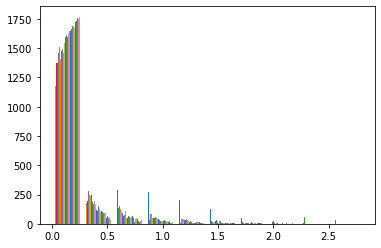

In [470]:
%matplotlib inline
import matplotlib.pyplot as plt

# plt.clf()
plt.hist((original_embeddings))
plt.show()


In [471]:
### linreg: mean coordinates and z-score memorability
# normalized: R^2 = 0.116, adjusted = 0.114
# mobius: R^2 = 0.062, adjusted = 0.06
import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(cat_concept_mem['cr'])
mean_concept_constant = sm.add_constant(np.array(concept_in_feat_coord).mean(0), prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     40.43
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.66e-25
Time:                        19:05:37   Log-Likelihood:                -2571.8
No. Observations:                1854   AIC:                             5152.
Df Residuals:                    1850   BIC:                             5174.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1699      0.056     -3.047      0.0

<IPython.core.display.Javascript object>


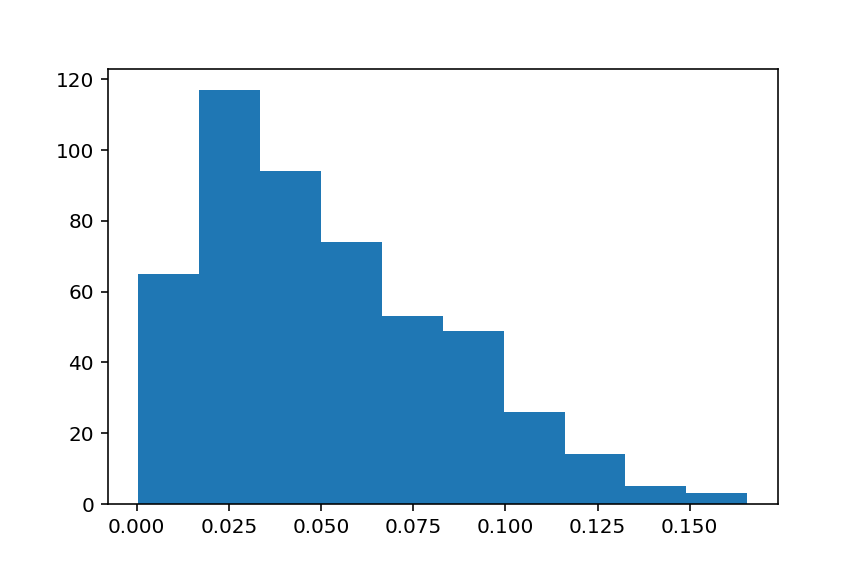

(array([ 65., 117.,  94.,  74.,  53.,  49.,  26.,  14.,   5.,   3.]),
 array([0.0005059 , 0.01701307, 0.03352025, 0.05002742, 0.06653459,
        0.08304177, 0.09954894, 0.11605611, 0.13256329, 0.14907046,
        0.16557763]),
 <BarContainer object of 10 artists>)

In [472]:
%matplotlib notebook

rsquares = []
for layer in concept_in_feat_coord:
    layer = sm.add_constant(layer)
    mod = sm.OLS(zscore_mem, layer)
    res = mod.fit()
    rsquares.append(res.rsquared)
plt.hist(rsquares)

In [473]:
concept_radius_in_feat = np.sqrt((np.array(concept_in_feat_coord)**2).sum(2))
concept_radius_in_feat

array([[16.86233787, 22.90098155, 23.60896402, ..., 21.28068315,
        18.84541504, 19.46527903],
       [14.95684673, 23.88617862, 23.82668268, ..., 20.70729513,
        21.327975  , 23.00948949],
       [20.48303869, 23.532408  , 23.36424693, ..., 22.79032913,
        20.77480307, 21.81831466],
       ...,
       [19.82970146, 23.13387188, 23.1075056 , ..., 21.80897524,
        21.38155131, 15.85200224],
       [21.41007222, 23.51354721, 23.68986049, ..., 22.81469343,
        23.27427487, 22.60177269],
       [21.09315038, 23.72003673, 23.90835321, ..., 22.99130207,
        23.09140521, 22.71729354]])

In [474]:
mean_concept_radius_in_feat = np.mean(concept_radius_in_feat, axis=0)
mean_concept_radius_in_feat

array([18.81621912, 22.77170428, 23.06998528, ..., 21.08168902,
       21.33735431, 21.49094358])

<IPython.core.display.Javascript object>


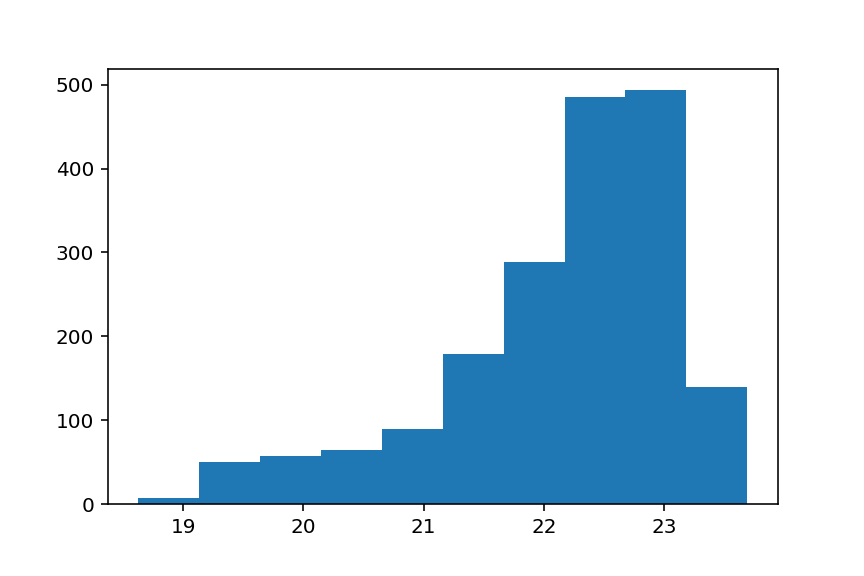

(array([  7.,  50.,  57.,  65.,  89., 179., 289., 485., 494., 139.]),
 array([18.62818002, 19.13430656, 19.6404331 , 20.14655964, 20.65268618,
        21.15881272, 21.66493927, 22.17106581, 22.67719235, 23.18331889,
        23.68944543]),
 <BarContainer object of 10 artists>)

In [475]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.clf()
plt.hist(mean_concept_radius_in_feat)

In [476]:
### radius --> memorability
# normalized: R^2 = 0.01, adjusted = 0.009
# mobius: R^2 = 0.014, adjusted = 0.013
zscore_mem = stats.zscore(mean_concept_in_feat_cat['cr'])
mean_concept_radius_const = sm.add_constant(mean_concept_radius_in_feat, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_radius_const)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     26.05
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.68e-07
Time:                        19:06:38   Log-Likelihood:                -2617.8
No. Observations:                1854   AIC:                             5240.
Df Residuals:                    1852   BIC:                             5251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1218      0.024     -5.103      0.0

#### visualize 1854 concepts in 49-dim feature space

In [477]:
# concept_coordinates vs. feature_embeddings
np.array(concept_in_feat_coord).shape
np.array(concept_in_feat_coord)[0,:3, :]

array([[ -9.12521902,   5.49181946, -13.07320678],
       [-19.81333598,   8.97972711,   7.15899255],
       [ -0.73460458,  18.52772593,  14.61392863]])

In [478]:
# concept in feature

from scipy.linalg import orthogonal_procrustes

concept_in_feat_reference = concept_in_feat_coord[0]
concept_in_feat_output = [concept_in_feat_reference]
for i in range(1, len(concept_in_feat_coord)):
    R, scale = orthogonal_procrustes(concept_in_feat_coord[i], concept_in_feat_reference)
    concept_in_feat_output.append(concept_in_feat_coord[i]@R)
concept_in_feat_reference

array([[ -9.12521902,   5.49181946, -13.07320678],
       [-19.81333598,   8.97972711,   7.15899255],
       [ -0.73460458,  18.52772593,  14.61392863],
       ...,
       [-13.26319396,   8.51062325, -14.30120461],
       [ -4.27448099,   6.47659698,  17.17358937],
       [-17.08838189,   1.26784255,  -9.23454749]])

In [479]:
np.array(concept_in_feat_output).shape

(500, 1854, 3)

In [480]:
# feature embeddings

feature_embed_reference = feature_embeddings[:,:,0]
feature_embed_output = [feature_embed_reference]
for i in range(1, feature_embeddings.shape[-1]):
    R, scale = orthogonal_procrustes(feature_embeddings[:,:,i], feature_embed_reference)
#     print(rotated)
    feature_embed_output.append(feature_embeddings[:,:,i]@R)

<IPython.core.display.Javascript object>


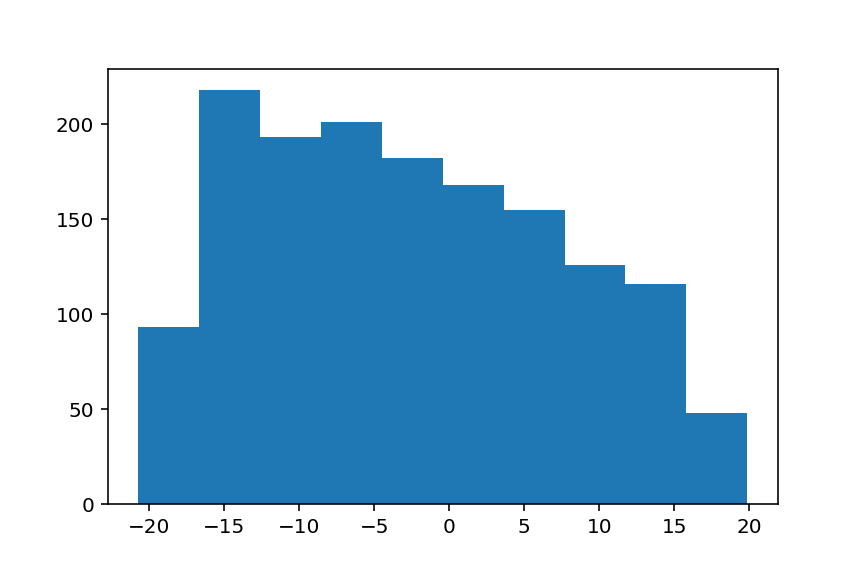

(array([ 93., 218., 193., 201., 182., 168., 155., 126., 116.,  48.]),
 array([-20.73446835, -16.67377708, -12.6130858 ,  -8.55239453,
         -4.49170326,  -0.43101199,   3.62967928,   7.69037056,
         11.75106183,  15.8117531 ,  19.87244437]),
 <BarContainer object of 10 artists>)

In [603]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.hist(np.array(feature_embed_output)[:, 2,:].flatten())

In [482]:
mean_concept_in_feat = np.array(concept_in_feat_output).mean(axis=0)
mean_feature_embed = np.array(feature_embed_output).mean(0)

In [60]:
# from sklearn.decomposition import PCA

# pca = PCA().fit(original_embeddings)
# pc_embeddings = pca.transform(mean_feature_embed.T).T

In [61]:
# pc_concepts = pca.transform(original_embeddings)

In [62]:
# pc_concept_coord = (pc_concepts@pc_embeddings)
# pc_concept_coord.shape

In [63]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d
# from matplotlib.colors import ListedColormap
# import re, seaborn as sns


# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')


# # ax.scatter(mean_concept_in_feat_cat_na[0], mean_concept_in_feat_cat_na[1], mean_concept_in_feat_cat_na[2]) 

# ax.scatter(pc_concept_coord.T[0], pc_concept_coord.T[1], pc_concept_coord.T[2], alpha=0.5) 
# ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')

In [64]:
# pc_concept_coord

In [483]:
mean_concept_in_feat_cat = pd.DataFrame(mean_concept_in_feat).reset_index().merge(cat_concept_mem, how='left', left_on='index', right_index=True)
mean_concept_in_feat_cat

index          0         1         2        cr  bigcat  \
0         0 -11.061892  5.807723 -5.774544  0.779739       1   
1         1 -15.278250  7.472864  0.813034  0.798485      13   
2         2 -11.227055  6.534603  2.327566  0.752845      18   
3         3 -15.358979  4.049547 -0.298633  0.761851      99   
4         4 -12.400387  6.934434 -5.493754  0.794466       9   
...     ...        ...       ...       ...       ...     ...   
1849   1849 -12.301532  6.357725  2.064918  0.722655      99   
1850   1850 -15.533367 -0.329141 -0.153504  0.843158      10   
1851   1851 -13.405238  7.779741 -5.107444  0.800163       1   
1852   1852 -10.567589  8.048745  3.242226  0.797468      99   
1853   1853 -15.062370  2.538319 -3.380397  0.823237      10   

                cat_name  
0                 animal  
1             home decor  
2     musical instrument  
3                    NaN  
4      electronic device  
...                  ...  
1849                 NaN  
1850                food  
1851              animal  
1852                 NaN  
1853                food  

[1854 rows x 7 columns]

In [484]:
mean_concept_in_feat_cat_na = mean_concept_in_feat_cat.dropna()
mean_concept_in_feat_cat_na

index          0         1         2        cr  bigcat  \
0         0 -11.061892  5.807723 -5.774544  0.779739       1   
1         1 -15.278250  7.472864  0.813034  0.798485      13   
2         2 -11.227055  6.534603  2.327566  0.752845      18   
4         4 -12.400387  6.934434 -5.493754  0.794466       9   
5         5 -12.977225  8.124122 -6.337655  0.806000      12   
...     ...        ...       ...       ...       ...     ...   
1847   1847 -12.021951  4.174294  3.666479  0.803129      24   
1848   1848 -16.136024  1.531517 -0.812516  0.765881      10   
1850   1850 -15.533367 -0.329141 -0.153504  0.843158      10   
1851   1851 -13.405238  7.779741 -5.107444  0.800163       1   
1853   1853 -15.062370  2.538319 -3.380397  0.823237      10   

                cat_name  
0                 animal  
1             home decor  
2     musical instrument  
4      electronic device  
5              furniture  
...                  ...  
1847                 toy  
1848                food  
1850                food  
1851              animal  
1853                food  

[1324 rows x 7 columns]

<IPython.core.display.Javascript object>


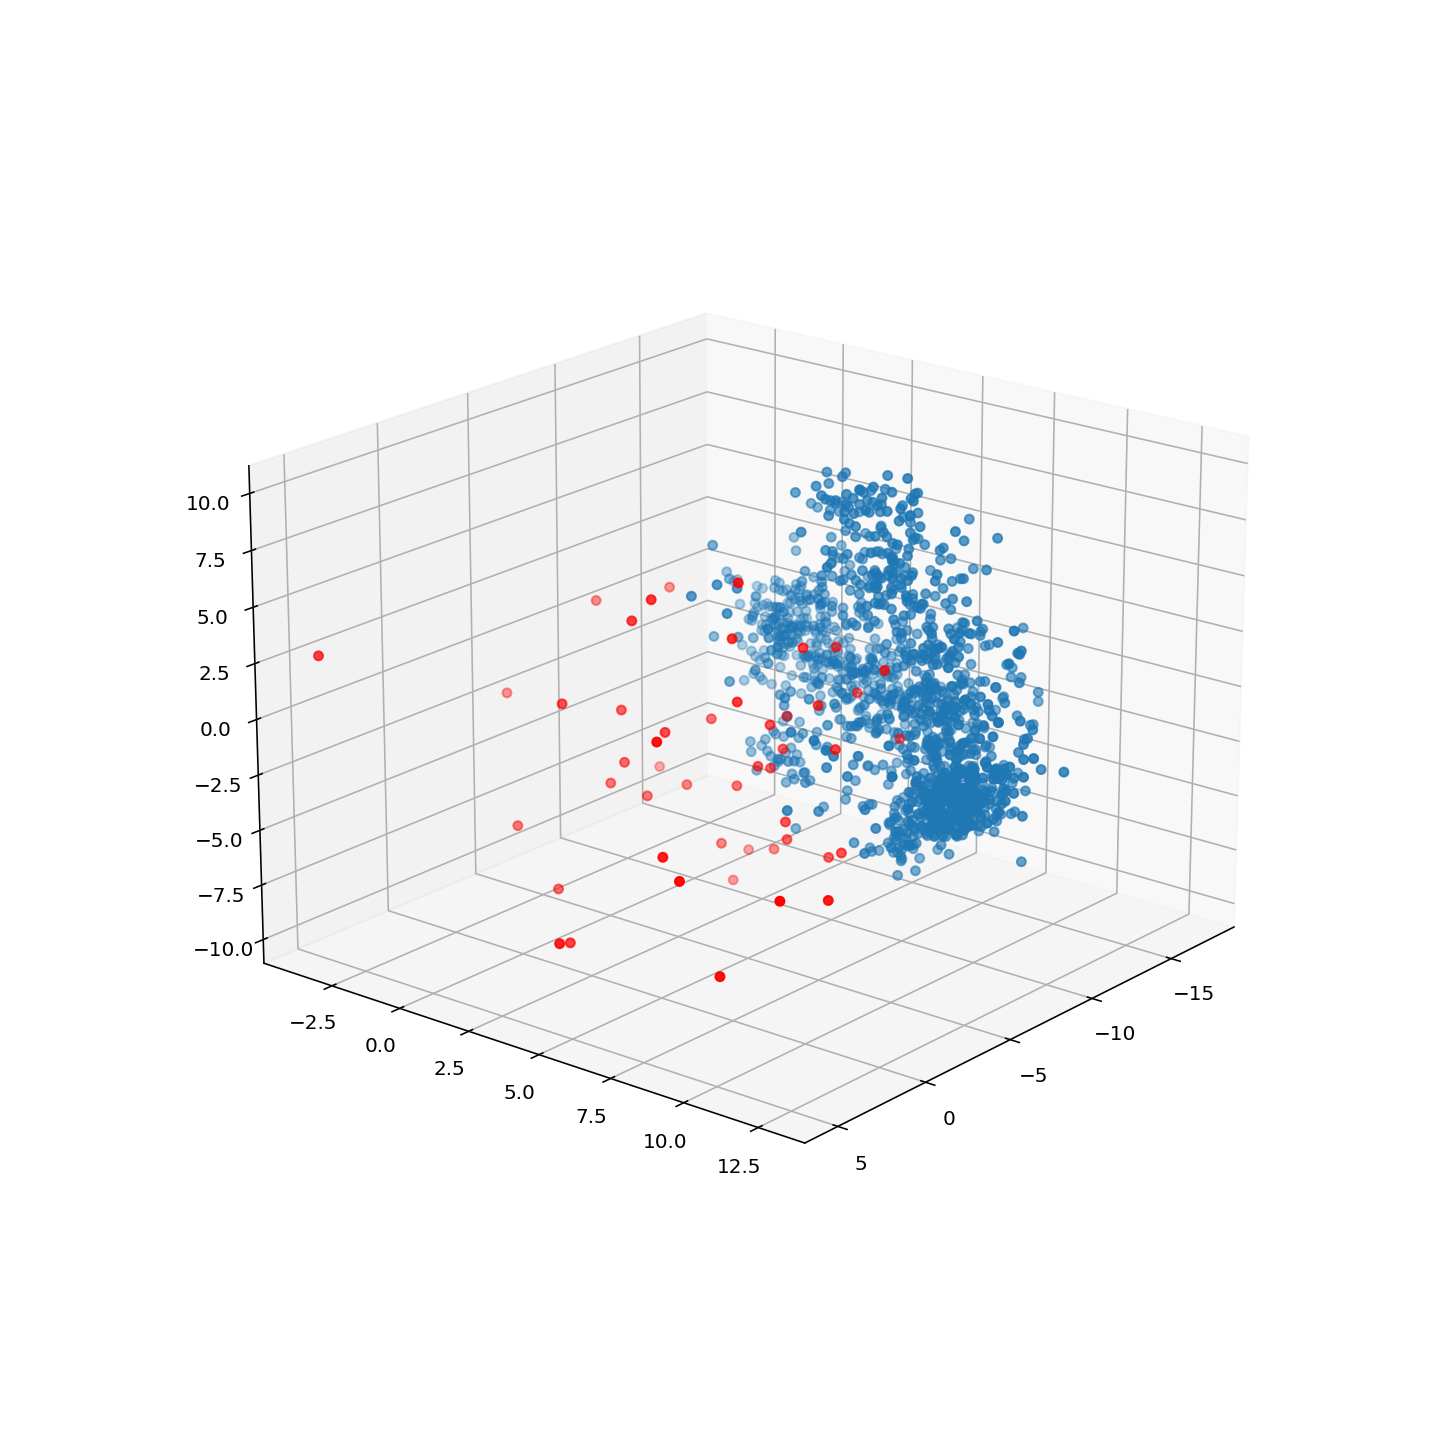

In [606]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import ListedColormap
import re, seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

concept_cat = ax.scatter(mean_concept_in_feat_cat_na[0], mean_concept_in_feat_cat_na[1], mean_concept_in_feat_cat_na[2]) 

ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')


# for txt, x, y, z in zip(feat_short_names, mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2]):
#     label = txt
#     ax.text(x, y, z, label)

# plt.xlim(-4.5, 4.5)
# plt.ylim(-4.5, 4.5)
# plt.zlim(-4.5, 4.5)
# plt.legend(*concept_cat.legend_elements(), bbox_to_anchor=(1.05, 1))
plt.show()

<IPython.core.display.Javascript object>


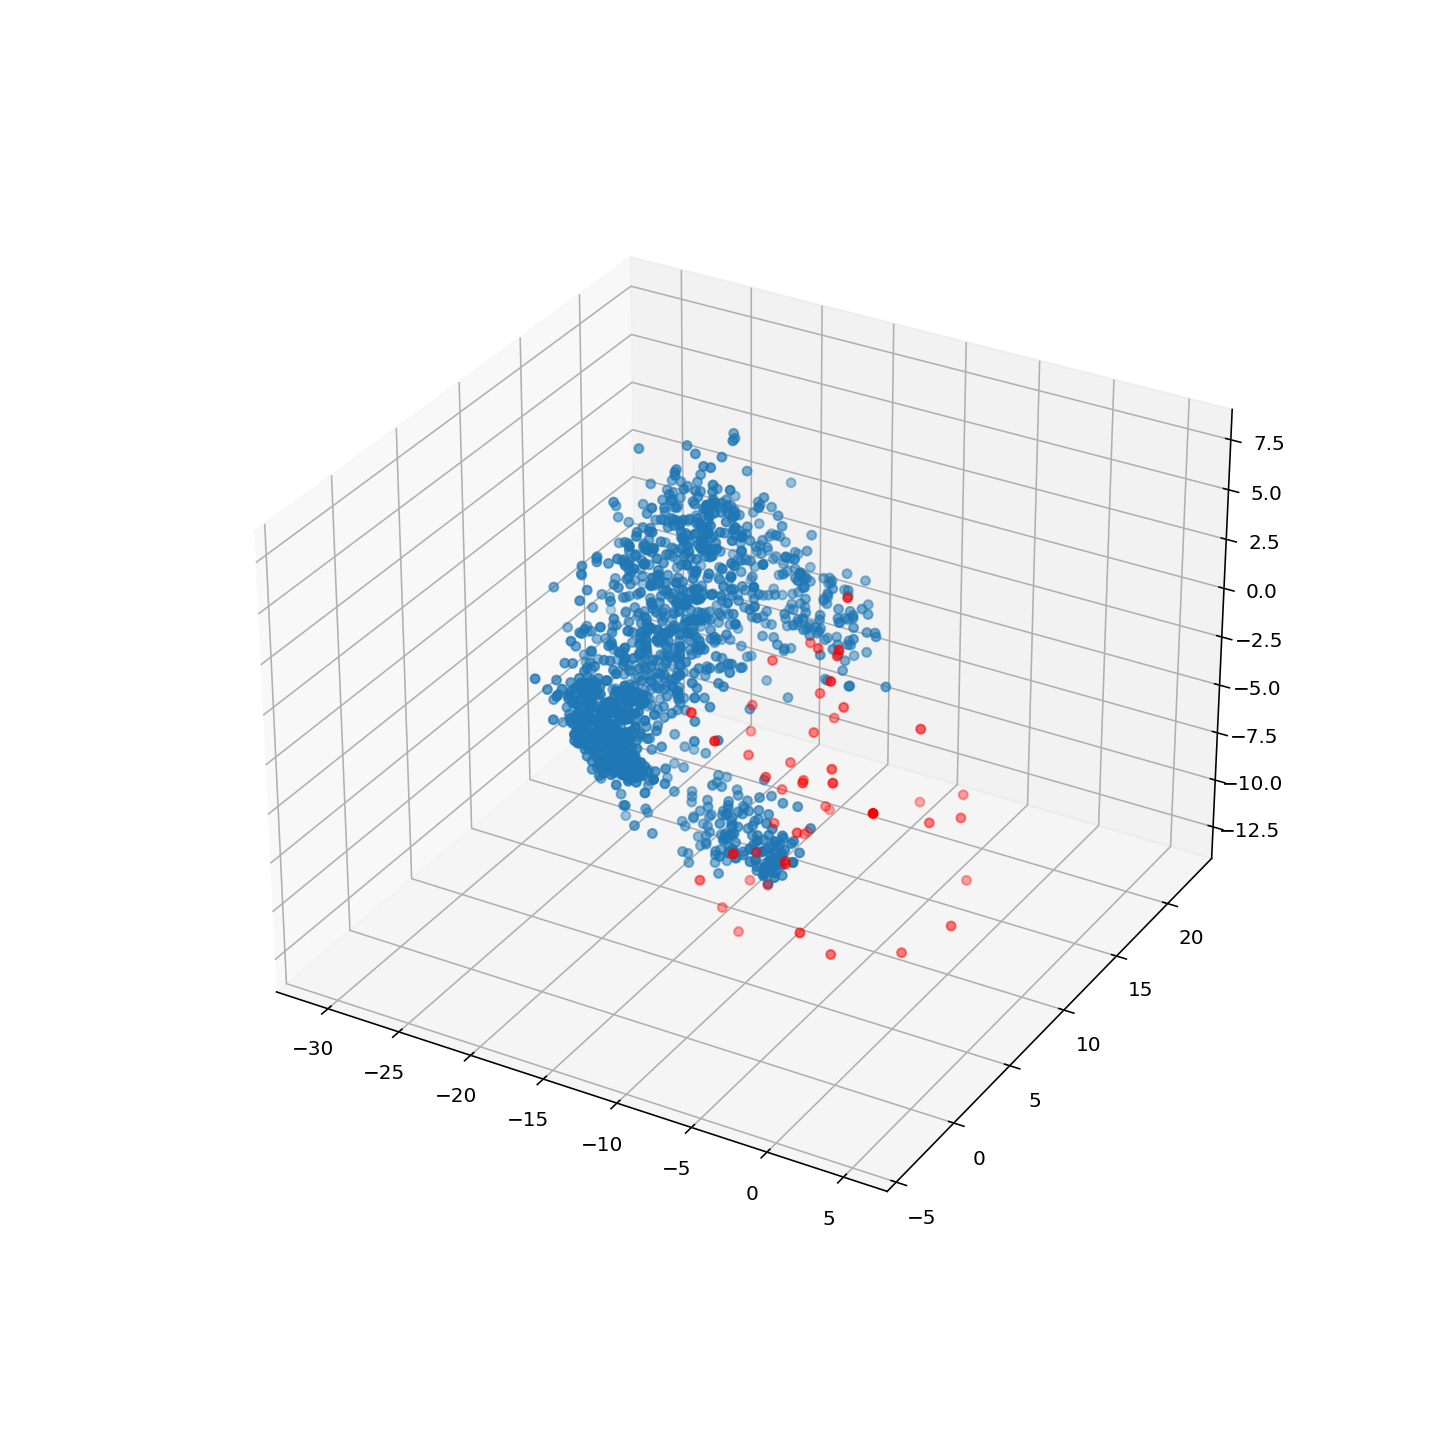

In [601]:
# concept_norm in feature

from scipy.linalg import orthogonal_procrustes

concept_in_feat_reference_norm = concept_in_feat_coord_norm[0]
concept_in_feat_output_norm = [concept_in_feat_reference_norm]
for i in range(1, len(concept_in_feat_coord_norm)):
    R, scale = orthogonal_procrustes(concept_in_feat_coord_norm[i], concept_in_feat_reference_norm)
    concept_in_feat_output_norm.append(concept_in_feat_coord_norm[i]@R)

mean_concept_in_feat_norm = np.array(concept_in_feat_output_norm).mean(axis=0)
mean_concept_in_feat_cat_norm = pd.DataFrame(mean_concept_in_feat_norm).reset_index().merge(cat_concept_mem, how='left', left_on='index', right_index=True)
mean_concept_in_feat_cat_na_norm = mean_concept_in_feat_cat_norm.dropna()

%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

concept_cat = ax.scatter(mean_concept_in_feat_cat_na_norm[0], mean_concept_in_feat_cat_na_norm[1], mean_concept_in_feat_cat_na_norm[2]) 

ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')



In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import ListedColormap
import re, seaborn as sns


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

concept_cat = ax.scatter(mean_concept_in_feat_cat_na[0], mean_concept_in_feat_cat_na[1], mean_concept_in_feat_cat_na[2]) 

ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')

In [486]:
def calculate_typicality(group):
    feat_matrix = []
    for concept in group['index']:
        feat_matrix.append(original_embeddings[concept])
    coef_matrix = np.corrcoef(feat_matrix)
#     print(np.mean(coef_matrix, axis=1))
    typicality = (np.sum(coef_matrix, axis=1)-1)/len(coef_matrix)
    group['typicality'] = typicality
#     print(typicality)
    return group

In [487]:
grouped = mean_concept_in_feat_cat_na.groupby('bigcat')
grouped = grouped.apply(calculate_typicality)
grouped

index          0         1         2        cr  bigcat  \
0         0 -11.061892  5.807723 -5.774544  0.779739       1   
1         1 -15.278250  7.472864  0.813034  0.798485      13   
2         2 -11.227055  6.534603  2.327566  0.752845      18   
4         4 -12.400387  6.934434 -5.493754  0.794466       9   
5         5 -12.977225  8.124122 -6.337655  0.806000      12   
...     ...        ...       ...       ...       ...     ...   
1847   1847 -12.021951  4.174294  3.666479  0.803129      24   
1848   1848 -16.136024  1.531517 -0.812516  0.765881      10   
1850   1850 -15.533367 -0.329141 -0.153504  0.843158      10   
1851   1851 -13.405238  7.779741 -5.107444  0.800163       1   
1853   1853 -15.062370  2.538319 -3.380397  0.823237      10   

                cat_name  typicality  
0                 animal    0.810913  
1             home decor    0.247628  
2     musical instrument    0.624589  
4      electronic device    0.522380  
5              furniture    0.509185  
...                  ...         ...  
1847                 toy    0.246697  
1848                food    0.786900  
1850                food    0.770485  
1851              animal    0.764335  
1853                food    0.705398  

[1324 rows x 8 columns]

In [489]:
### typicality vs. memorability
# R^2 = 0.032, adjusted = 0.031
import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(grouped['cr'])
mean_concept_constant = sm.add_constant(grouped['typicality'], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           5.50e-11
Time:                        19:09:23   Log-Likelihood:                -1857.1
No. Observations:                1324   AIC:                             3718.
Df Residuals:                    1322   BIC:                             3729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
typicality     0.9536      0.144      6.612      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [491]:
### coordinates vs. typicality
# normalized: R^2 = 0.479, adjusted = 0.478
# mobius: R^2 = 0.136, adjusted = 0.134
import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(grouped['typicality'])
mean_concept_constant = sm.add_constant(grouped[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             typicality   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     69.08
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.69e-41
Time:                        19:09:41   Log-Likelihood:                -1782.1
No. Observations:                1324   AIC:                             3572.
Df Residuals:                    1320   BIC:                             3593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0603      0.013     -4.627      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [586]:
### join grouped with human rated typicality
concept_typicality_rated['concept'] = concept_typicality_rated['concept'].astype(int)
grouped_with_rated = grouped.merge(concept_typicality_rated, how="inner", left_on=['index', 'bigcat'], right_on=['concept', 'cat'], suffixes=('', '_rated'))
grouped_with_rated


index          0         1         2        cr  bigcat  \
0         0 -11.061892  5.807723 -5.774544  0.779739       1   
1         1 -15.278250  7.472864  0.813034  0.798485      13   
2         2 -11.227055  6.534603  2.327566  0.752845      18   
3         4 -12.400387  6.934434 -5.493754  0.794466       9   
4         5 -12.977225  8.124122 -6.337655  0.806000      12   
...     ...        ...       ...       ...       ...     ...   
1287   1847 -12.021951  4.174294  3.666479  0.803129      24   
1288   1848 -16.136024  1.531517 -0.812516  0.765881      10   
1289   1850 -15.533367 -0.329141 -0.153504  0.843158      10   
1290   1851 -13.405238  7.779741 -5.107444  0.800163       1   
1291   1853 -15.062370  2.538319 -3.380397  0.823237      10   

                cat_name  typicality  cat  concept  typicality_rated  
0                 animal    0.810913    1        0          4.874352  
1             home decor    0.247628   13        1          2.613022  
2     musical instrument    0.624589   18        2          5.605201  
3      electronic device    0.522380    9        4          5.966682  
4              furniture    0.509185   12        5          4.451417  
...                  ...         ...  ...      ...               ...  
1287                 toy    0.246697   24     1847          7.111927  
1288                food    0.786900   10     1848          7.064713  
1289                food    0.770485   10     1850          4.520777  
1290              animal    0.764335    1     1851          7.177455  
1291                food    0.705398   10     1853          6.354120  

[1292 rows x 11 columns]

In [587]:
### typicality vs. memorability
# R^2 = 0.032, adjusted = 0.031
import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(grouped_with_rated['cr'])
mean_concept_constant = sm.add_constant(grouped_with_rated['typicality_rated'], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1171
Date:                Thu, 28 Jul 2022   Prob (F-statistic):              0.732
Time:                        22:58:45   Log-Likelihood:                -1833.2
No. Observations:                1292   AIC:                             3670.
Df Residuals:                    1290   BIC:                             3681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
typicality_rated     0.0070      0.021  

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [588]:
### coordinates vs. typicality
# normalized: R^2 = 0.479, adjusted = 0.478
# mobius: R^2 = 0.136, adjusted = 0.134
import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(grouped_with_rated['typicality_rated'])
mean_concept_constant = sm.add_constant(grouped_with_rated[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       typicality_rated   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.948
Date:                Thu, 28 Jul 2022   Prob (F-statistic):             0.0318
Time:                        22:59:14   Log-Likelihood:                -1828.8
No. Observations:                1292   AIC:                             3666.
Df Residuals:                    1288   BIC:                             3686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0210      0.014      1.492      0.1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


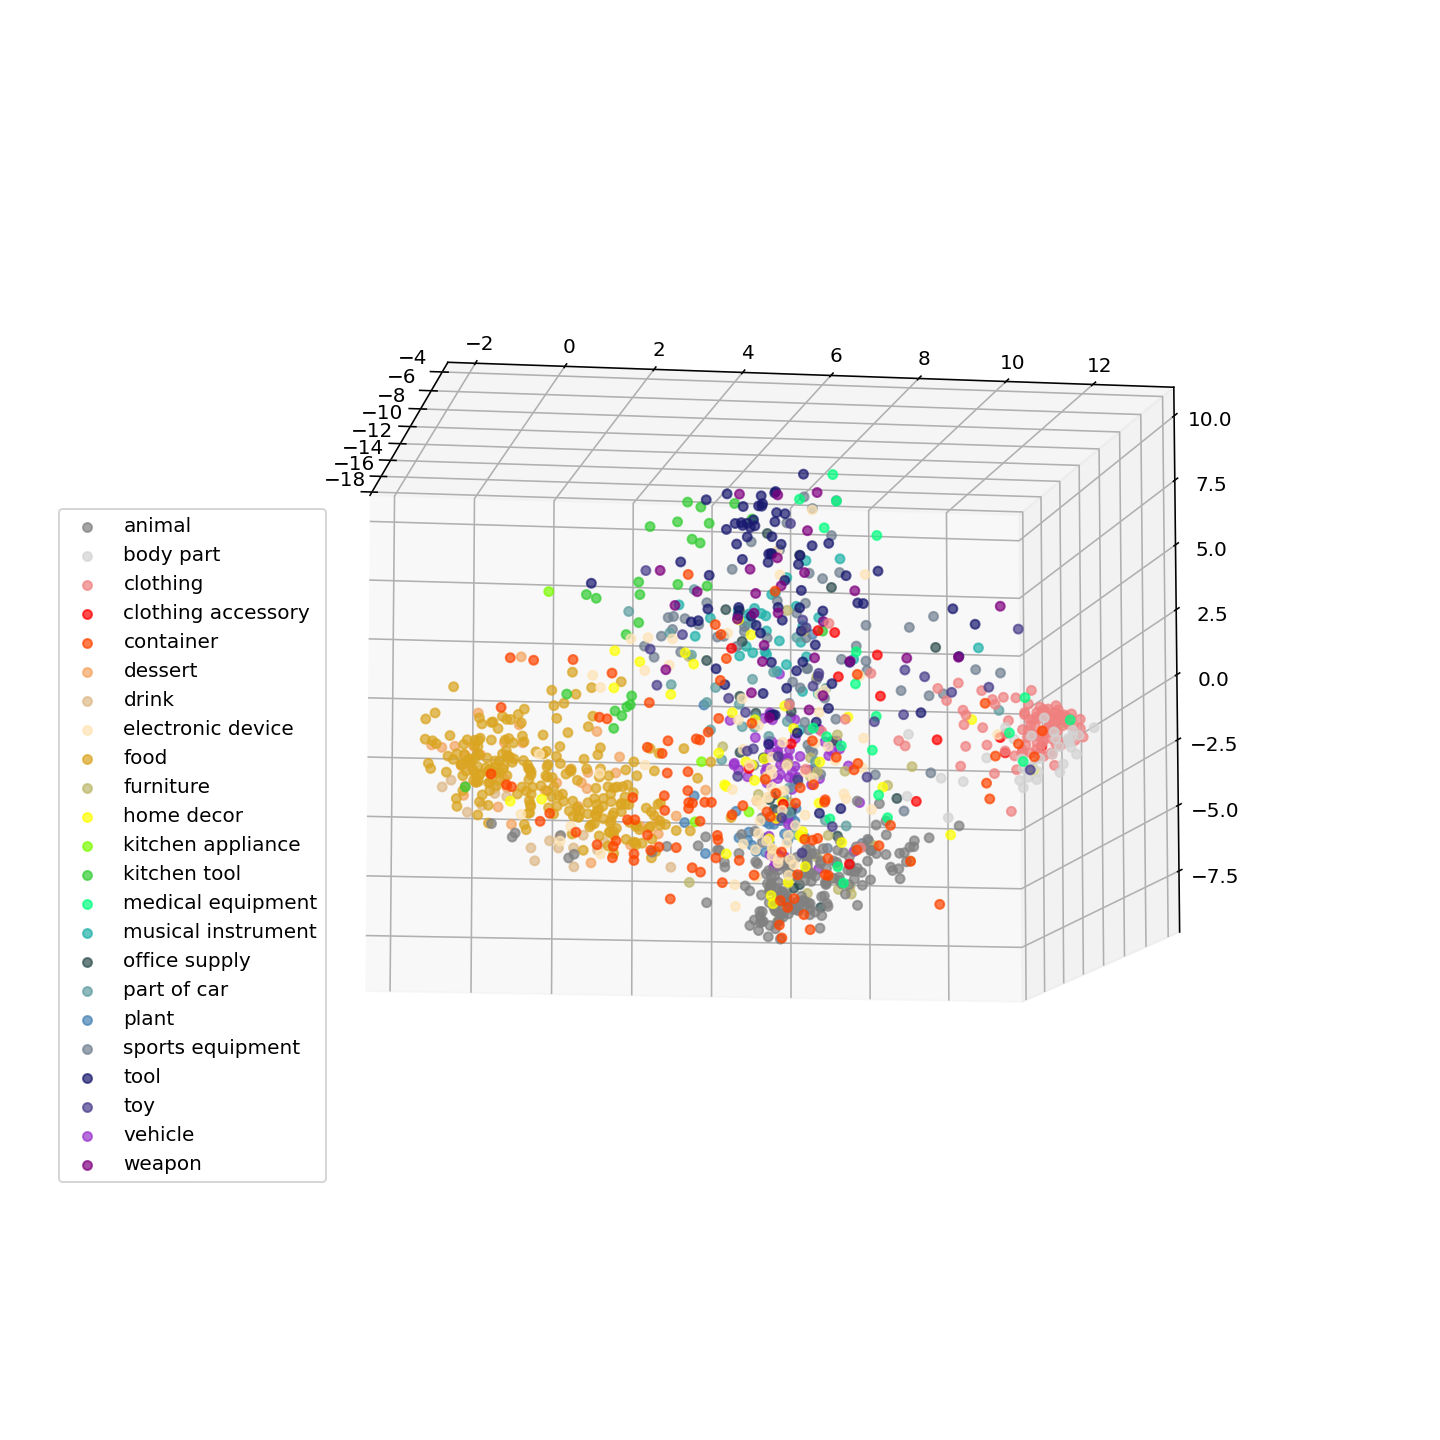

In [493]:
### color by categories: repeat color assignment
import matplotlib.colors as mcolors
%matplotlib notebook

colors = mcolors.CSS4_COLORS
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                for name, color in colors.items())
color_names = [name for hsv, name in by_hsv]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

groups = mean_concept_in_feat_cat_na.groupby("cat_name")
i = 3
for name, group in groups:
    ax.scatter(group[0], group[1], group[2], label=name, alpha=0.7, color=color_names[i])
    i = i+6
plt.legend(bbox_to_anchor=(0.13,0.7))

# ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')


<IPython.core.display.Javascript object>


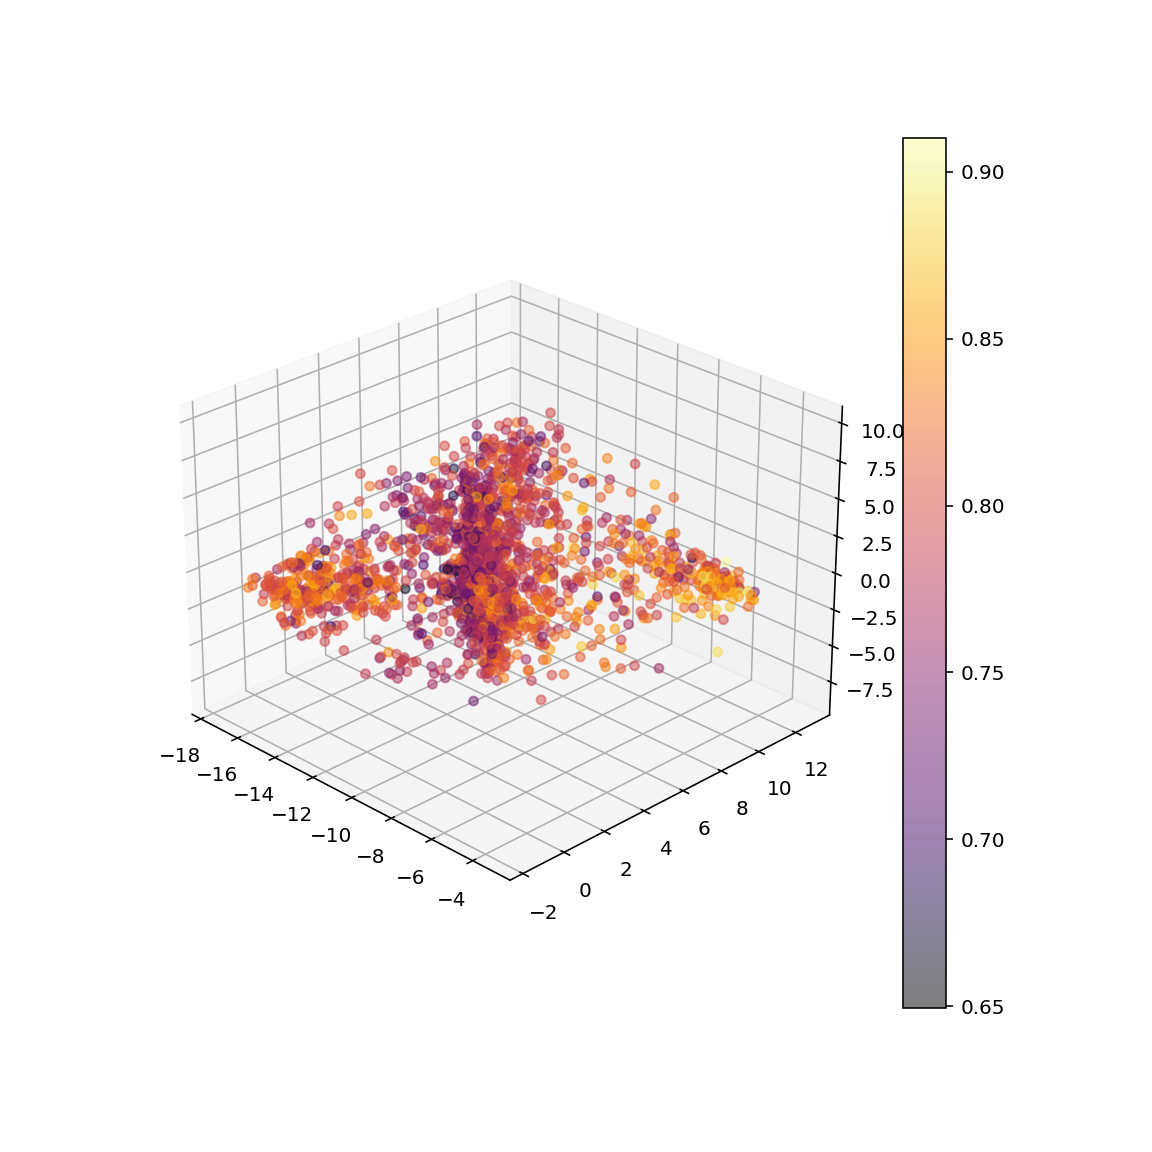

In [494]:
### concept with memorability score in feature space

%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection ='3d')

# print(mean_feat_in_concept.shape)

feature_space = ax.scatter(mean_concept_in_feat_cat[0], mean_concept_in_feat_cat[1], mean_concept_in_feat_cat[2], c=mean_concept_in_feat_cat['cr'], cmap='inferno', alpha=0.5)
# ax.scatter(mean_feature_embed.T[0], mean_feature_embed.T[1], mean_feature_embed.T[2], color='red')

plt.colorbar(feature_space)
plt.show()


<IPython.core.display.Javascript object>


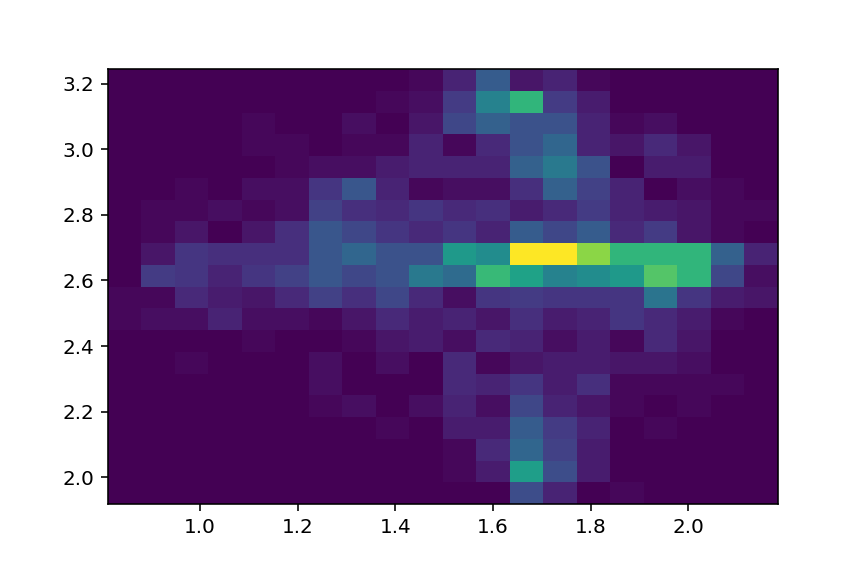

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  9.,  3.,  1.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  6.,  8.,  8.,  3.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  5.,  7.,  0.,
          2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  8.,  7.,  3.,
          1.,  2.,  0.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  6., 10.,  7.,  7.,
          2.,  2.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,  1., 10., 14., 14., 14.,
         10.,  8.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  3.,  7., 11., 17., 11.,
          7., 14.,  2.,  1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  2.,  3.,

In [495]:
### 2d histogram of angles: concepts clustering at certain angle in feature embeddings?
%matplotlib notebook

plt.clf()
# x=np.sqrt((np.array(concept_embed_output)**2).sum(2)).mean(axis=1)
# y=np.sqrt((np.array(feature_in_con_output)**2).sum(1)).mean(axis=1)

from scipy.stats import spearmanr
# spearmanr(x,y)

from hyperbolicMDS.mds import HyperMDS, cart_to_polar
from matplotlib import colors
r, theta, rho = cart_to_polar(mean_concept_in_feat).T
plt.hist2d(theta, rho,
           bins = 20)
#            cmap = "RdYlGn_r",
#            norm = colors.LogNorm())


In [611]:
r, theta, rho = cart_to_polar(grouped[[0,1,2]].values).T
r

array([13.76373717, 17.02732108, 13.19717241, ..., 15.53761199,
       16.31903111, 15.64433221])

In [614]:
import statsmodels.api as sm
import scipy.stats as stats

# r, theta, rho = cart_to_polar(grouped[[0,1,2]]).T

zscore_mem = stats.zscore(grouped['typicality'])
mean_concept_constant = sm.add_constant(np.array([r, theta, rho]).T, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             typicality   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     89.74
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           7.53e-53
Time:                        08:22:51   Log-Likelihood:                -1755.8
No. Observations:                1324   AIC:                             3520.
Df Residuals:                    1320   BIC:                             3540.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1628      0.017      9.331      0.0

In [615]:
zscore_mem = stats.zscore(grouped['cr'])
mean_concept_constant = sm.add_constant(np.array([grouped['typicality'], r, theta, rho]).T, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     30.84
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.42e-24
Time:                        08:24:53   Log-Likelihood:                -1819.5
No. Observations:                1324   AIC:                             3649.
Df Residuals:                    1319   BIC:                             3675.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4466      0.154      9.394      0.0

In [496]:
polar_coord = pd.DataFrame(list(zip(r, theta, rho)), columns=['r','theta','rho'])
polar_coord

r     theta       rho
0     13.763737  2.003743  2.658129
1     17.027321  1.523029  2.686689
2     13.197172  1.393500  2.614483
3     15.886669  1.589595  2.883799
4     15.232770  1.939765  2.631705
...         ...       ...       ...
1849  14.000437  1.422767  2.664577
1850  15.537612  1.580676  3.162779
1851  16.319031  1.889120  2.615746
1852  13.673634  1.331401  2.490681
1853  15.644332  1.788592  2.974641

[1854 rows x 3 columns]

In [497]:
### linreg: polar coordinates and z-score memorability
# normalized: R^2 = 0.043, adjusted = 0.041
# mobius: R^2 = 0.019, adjusted = 0.018
zscore_mem = stats.zscore(mean_concept_in_feat_cat['cr'])
# polar_constant = sm.add_constant(polar_coord - polar_coord.mean(0), prepend=False)
mod = sm.OLS(zscore_mem, polar_coord)

res = mod.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                     cr   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              12.13
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    7.35e-08
Time:                        19:11:19   Log-Likelihood:                         -2612.7
No. Observations:                1854   AIC:                                      5231.
Df Residuals:                    1851   BIC:                                      5248.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [498]:
### linreg: procrustes coordinates and z-score memorability
# normalized: R^2 = 0.098, adjusted = 0.096
# mobius: R^2 = 0.072, adjusted = 0.071

import statsmodels.api as sm
import scipy.stats as stats

zscore_mem = stats.zscore(mean_concept_in_feat_cat['cr'])
mean_concept_constant = sm.add_constant(mean_concept_in_feat_cat[[0,1,2]], prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     48.07
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           6.49e-30
Time:                        19:11:39   Log-Likelihood:                -2561.1
No. Observations:                1854   AIC:                             5130.
Df Residuals:                    1850   BIC:                             5152.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1237      0.011     11.275      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


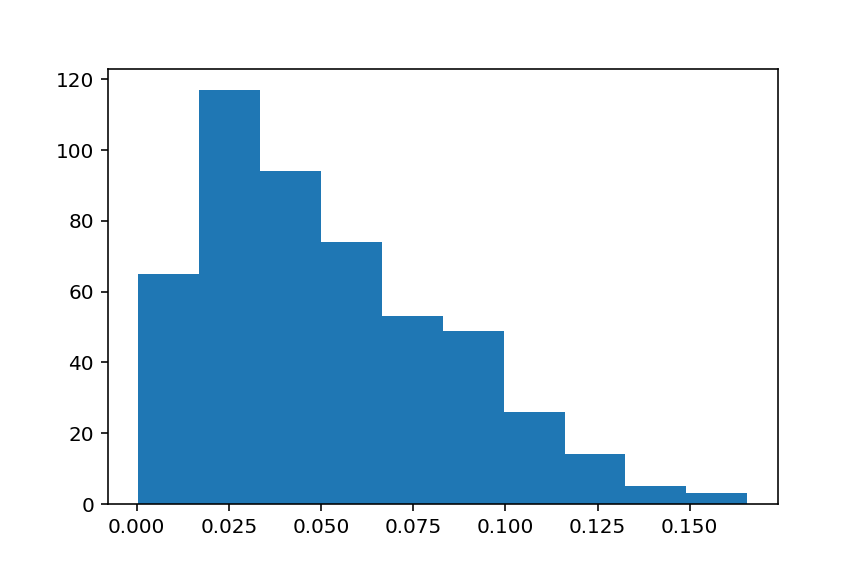

(array([ 65., 117.,  94.,  74.,  53.,  49.,  26.,  14.,   5.,   3.]),
 array([0.0005059 , 0.01701307, 0.03352025, 0.05002742, 0.06653459,
        0.08304177, 0.09954894, 0.11605611, 0.13256329, 0.14907046,
        0.16557763]),
 <BarContainer object of 10 artists>)

In [499]:
%matplotlib notebook

rsquares = []
for layer in concept_in_feat_output:
    layer = sm.add_constant(layer)
    mod = sm.OLS(zscore_mem, layer)
    res = mod.fit()
    rsquares.append(res.rsquared)
plt.hist(rsquares)

In [545]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=42).fit(mean_concept_in_feat_cat[[0,1,2]])
labels = kmeans.labels_
kmeans.cluster_centers_


array([[ -7.30086284,  10.71031914,  -1.42160007],
       [-15.29307867,   1.54747709,  -1.55116161],
       [-11.80087129,   6.04370648,   3.67303959],
       [-12.71415985,   6.87380856,  -3.88723854]])

<IPython.core.display.Javascript object>


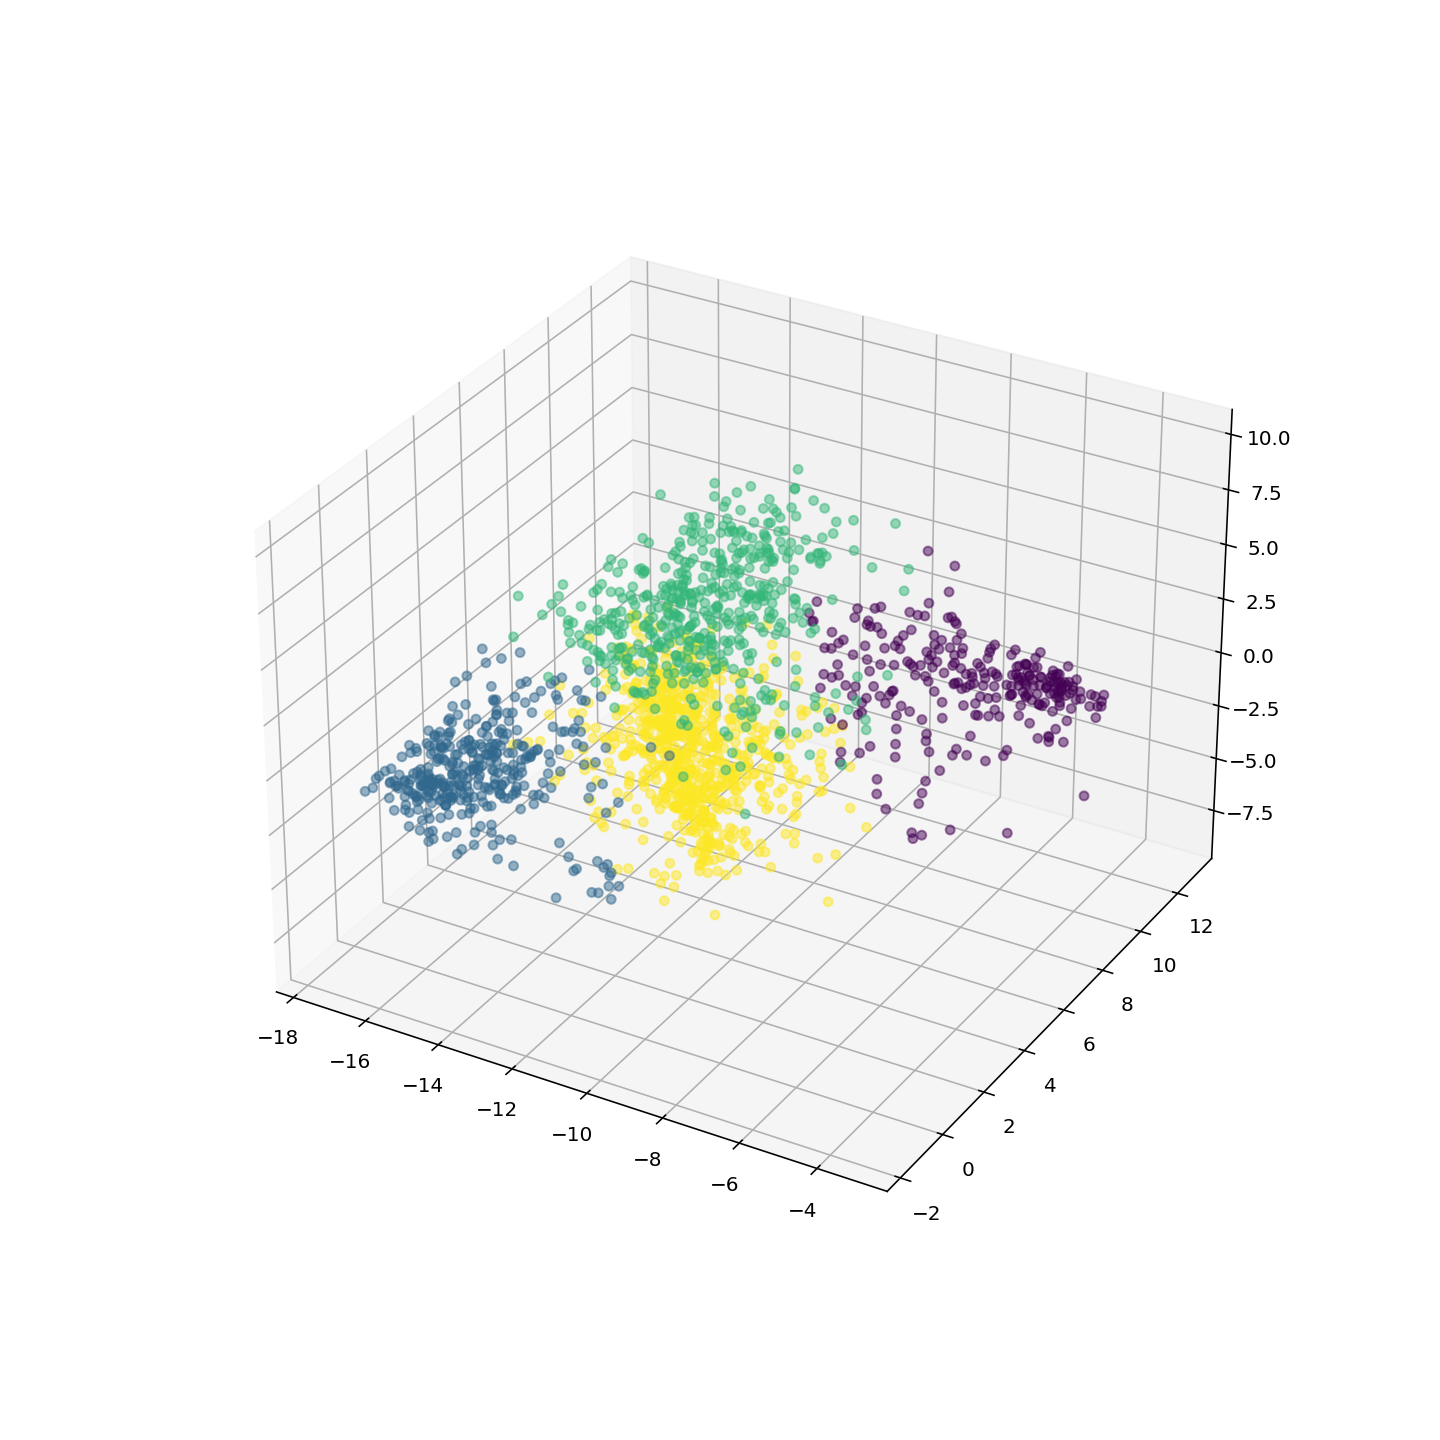

In [546]:
### clusters by memorability and plot concept coordinates in feature space
%matplotlib notebook


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(mean_concept_in_feat_cat[0], mean_concept_in_feat_cat[1], mean_concept_in_feat_cat[2], c=labels, alpha=0.5)



In [547]:
concept_coord_cluster = mean_concept_in_feat_cat
concept_coord_cluster['label'] = labels
concept_coord_cluster

index          0         1         2        cr  bigcat  \
0         0 -11.061892  5.807723 -5.774544  0.779739       1   
1         1 -15.278250  7.472864  0.813034  0.798485      13   
2         2 -11.227055  6.534603  2.327566  0.752845      18   
3         3 -15.358979  4.049547 -0.298633  0.761851      99   
4         4 -12.400387  6.934434 -5.493754  0.794466       9   
...     ...        ...       ...       ...       ...     ...   
1849   1849 -12.301532  6.357725  2.064918  0.722655      99   
1850   1850 -15.533367 -0.329141 -0.153504  0.843158      10   
1851   1851 -13.405238  7.779741 -5.107444  0.800163       1   
1852   1852 -10.567589  8.048745  3.242226  0.797468      99   
1853   1853 -15.062370  2.538319 -3.380397  0.823237      10   

                cat_name  label  
0                 animal      3  
1             home decor      2  
2     musical instrument      2  
3                    NaN      1  
4      electronic device      3  
...                  ...    ...  
1849                 NaN      2  
1850                food      1  
1851              animal      3  
1852                 NaN      2  
1853                food      1  

[1854 rows x 8 columns]

In [548]:
cluster_0 = concept_coord_cluster[concept_coord_cluster['label'] == 0]
zscore_mem_0 = stats.zscore(cluster_0['cr'])
mean_concept_constant = sm.add_constant(cluster_0[[0,1,2]], prepend=False)
mod_0 = sm.OLS(zscore_mem_0, mean_concept_constant)

res_0 = mod_0.fit()
print(res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     10.49
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.58e-06
Time:                        19:15:43   Log-Likelihood:                -349.60
No. Observations:                 257   AIC:                             707.2
Df Residuals:                     253   BIC:                             721.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1324      0.033      4.019      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [549]:
polar_cluster_0 = cart_to_polar(cluster_0[[0,1,2]].values) - cart_to_polar(concept_coord_cluster[[0,1,2]].values).mean(0)
cluster_0 = concept_coord_cluster[concept_coord_cluster['label'] == 0]
zscore_mem = stats.zscore(cluster_0['cr'])
mean_concept_constant = sm.add_constant(polar_cluster_0, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     10.52
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.51e-06
Time:                        19:15:44   Log-Likelihood:                -349.56
No. Observations:                 257   AIC:                             707.1
Df Residuals:                     253   BIC:                             721.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0198      0.040      0.498      0.6

In [550]:
cluster_1 = concept_coord_cluster[concept_coord_cluster['label'] == 1]
zscore_mem_1 = stats.zscore(cluster_1['cr'])
mean_concept_constant = sm.add_constant(cluster_1[[0,1,2]], prepend=False)
mod_1 = sm.OLS(zscore_mem_1, mean_concept_constant)

res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.942
Date:                Thu, 28 Jul 2022   Prob (F-statistic):            0.00225
Time:                        19:15:46   Log-Likelihood:                -493.54
No. Observations:                 353   AIC:                             995.1
Df Residuals:                     349   BIC:                             1011.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.1115      0.046     -2.437      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [551]:
polar_cluster_1 = cart_to_polar(cluster_1[[0,1,2]].values) - cart_to_polar(concept_coord_cluster[[0,1,2]].values).mean(0)
cluster_1 = concept_coord_cluster[concept_coord_cluster['label'] == 1]
zscore_mem = stats.zscore(cluster_1['cr'])
mean_concept_constant = sm.add_constant(polar_cluster_1, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.023
Date:                Thu, 28 Jul 2022   Prob (F-statistic):            0.00202
Time:                        19:15:47   Log-Likelihood:                -493.42
No. Observations:                 353   AIC:                             994.8
Df Residuals:                     349   BIC:                             1010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0900      0.047      1.897      0.0

In [552]:
cluster_2 = concept_coord_cluster[concept_coord_cluster['label'] == 2]
zscore_mem_2 = stats.zscore(cluster_2['cr'])
mean_concept_constant = sm.add_constant(cluster_2[[0,1,2]], prepend=False)
mod_2 = sm.OLS(zscore_mem_2, mean_concept_constant)

res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     16.83
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.02e-10
Time:                        19:15:48   Log-Likelihood:                -678.15
No. Observations:                 495   AIC:                             1364.
Df Residuals:                     491   BIC:                             1381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1747      0.027      6.461      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [553]:
polar_cluster_2 = cart_to_polar(cluster_2[[0,1,2]].values) - cart_to_polar(concept_coord_cluster[[0,1,2]].values).mean(0)
cluster_2 = concept_coord_cluster[concept_coord_cluster['label'] == 2]
zscore_mem = stats.zscore(cluster_2['cr'])
mean_concept_constant = sm.add_constant(polar_cluster_2, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     15.82
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           7.82e-10
Time:                        19:15:49   Log-Likelihood:                -679.54
No. Observations:                 495   AIC:                             1367.
Df Residuals:                     491   BIC:                             1384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1181      0.027     -4.408      0.0

In [554]:
cluster_3 = concept_coord_cluster[concept_coord_cluster['label'] == 3]
zscore_mem_3 = stats.zscore(cluster_3['cr'])
mean_concept_constant = sm.add_constant(cluster_3[[0,1,2]], prepend=False)
mod_3 = sm.OLS(zscore_mem_3, mean_concept_constant)

res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     34.86
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.36e-21
Time:                        19:15:50   Log-Likelihood:                -1013.6
No. Observations:                 749   AIC:                             2035.
Df Residuals:                     745   BIC:                             2054.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1962      0.026      7.609      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [555]:
polar_cluster_3 = cart_to_polar(cluster_3[[0,1,2]].values) - cart_to_polar(concept_coord_cluster[[0,1,2]].values).mean(0)
cluster_3 = concept_coord_cluster[concept_coord_cluster['label'] == 3]
zscore_mem = stats.zscore(cluster_3['cr'])
mean_concept_constant = sm.add_constant(polar_cluster_3, prepend=False)
mod = sm.OLS(zscore_mem, mean_concept_constant)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     34.46
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           7.30e-21
Time:                        19:15:52   Log-Likelihood:                -1014.1
No. Observations:                 749   AIC:                             2036.
Df Residuals:                     745   BIC:                             2055.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0764      0.024     -3.236      0.0

In [518]:
# cluster_4 = concept_coord_cluster[concept_coord_cluster['label'] == 4]
# zscore_mem_4 = stats.zscore(cluster_4['cr'])
# mean_concept_constant = sm.add_constant(cluster_4[[0,1,2]], prepend=False)
# mod_4 = sm.OLS(zscore_mem_4, mean_concept_constant)

# res_4 = mod_4.fit()
# print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     cr   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.00
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.68e-07
Time:                        19:13:18   Log-Likelihood:                -489.22
No. Observations:                 357   AIC:                             986.4
Df Residuals:                     353   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.1652      0.032      5.139      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [521]:
# polar_cluster_4 = cart_to_polar(cluster_4[[0,1,2]].values) - cart_to_polar(concept_coord_cluster[[0,1,2]].values).mean(0)
# cluster_4 = concept_coord_cluster[concept_coord_cluster['label'] == 4]
# zscore_mem = stats.zscore(cluster_4['cr'])
# mean_concept_constant = sm.add_constant(polar_cluster_4, prepend=False)
# mod = sm.OLS(zscore_mem, mean_concept_constant)

# res = mod.fit()
# print(res.summary())

<IPython.core.display.Javascript object>


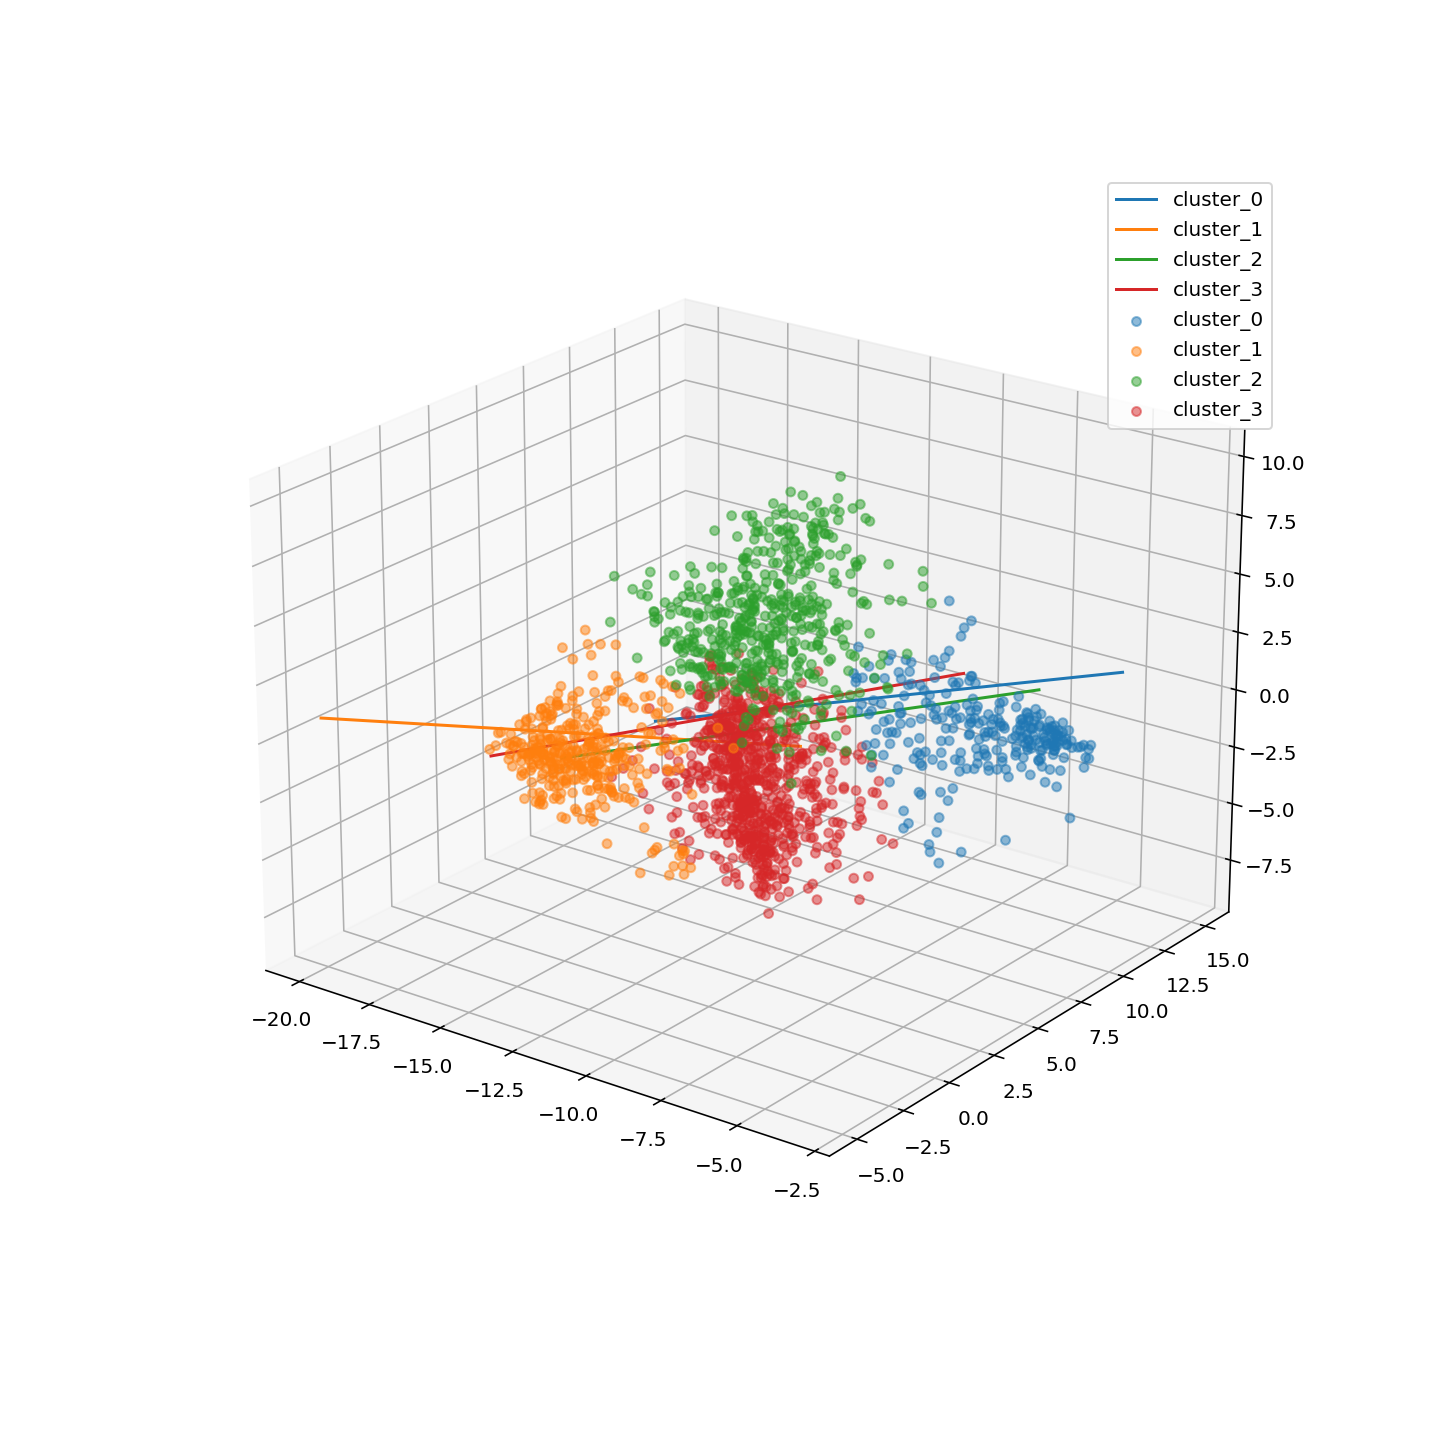

In [607]:
### Memorability changes by coordinates in each cluster
# normalized: highest R^2 (cluster 1) = 0.318
# mobius: highest R^2 (cluster 3) = 0.123

%matplotlib notebook

# plt.clf()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(cluster_0[0], cluster_0[1], cluster_0[2], label='cluster_0', alpha=0.5)
# ax.plot(np.linspace(-30,-20,100), np.linspace(10,20,100), -2.5+-.5+np.linspace(-30,-20,100)*.0057+ np.linspace(10,20,100)*.0509+ np.linspace(-7.5, 2.5, 100)*.0108, label='cluster_0', alpha=1)
ax.plot(np.linspace(-15,-5,100), np.linspace(5,15,100), -.3135+np.linspace(-15,-5,100)*.1324+ np.linspace(5,15,100)*.1098+ np.linspace(-5, 5, 100)*-.0734, label='cluster_0', alpha=1)


# c0_grid = np.meshgrid(np.linspace(-20,-30,100), np.linspace(10,20,100))
# ax.plot_surface(c0_grid[0], c0_grid[1], -.5+X*.0057+ Y*.0509, label='cluster_0', alpha=1)

ax.scatter(cluster_1[0], cluster_1[1], cluster_1[2], label='cluster_1', alpha=0.5)
# ax.plot(np.linspace(-20,-10,100), np.linspace(10,20,100), .59+np.linspace(-20,-10,100)*.1288+ np.linspace(10,20,100)*.1266+ np.linspace(-5, 5, 100)*.0101, label='cluster_1', alpha=1)
ax.plot(np.linspace(-20,-10,100), np.linspace(-5,5,100), -1.5349+np.linspace(-20,-10,100)*-.1115+ np.linspace(-5,5,100)*-.0823+ np.linspace(-5, 5, 100)*.0273, label='cluster_1', alpha=1)


# c1_grid = np.meshgrid(np.linspace(-10,-20,100), np.linspace(10,20,100))
# ax.plot_surface(c1_grid[0], c1_grid[1], .59+X*.1288+ Y*.1266, label='cluster_1', alpha=1)

ax.scatter(cluster_2[0], cluster_2[1], cluster_2[2], label='cluster_2', alpha=0.5)
# ax.plot(np.linspace(-25,-15,100), np.linspace(0,10,100), -.49+np.linspace(-25,-15,100)*-.0665+ np.linspace(0,10,100)*-.1488+ np.linspace(-7.5, 2.5, 100)*-.0007, label='cluster_2', alpha=1)
ax.plot(np.linspace(-15,-5,100), np.linspace(0,10,100), 1.6519+np.linspace(-15,-5,100)*.1747+ np.linspace(0,10,100)*.0601+ np.linspace(0, 10, 100)*.0127, label='cluster_2', alpha=1)


# c2_grid = np.meshgrid(np.linspace(-25,-15,100), np.linspace(0,10,100))
# ax.plot_surface(c2_grid[0], c2_grid[1], -.49+X*-.0665+ Y*-.1488, label='cluster_2', alpha=1)

ax.scatter(cluster_3[0], cluster_3[1], cluster_3[2], label='cluster_3', alpha=0.5)
# ax.plot(np.linspace(-20,-10,100), np.linspace(5,15,100), -10+.47+np.linspace(-20,-10,100)*.1483+ np.linspace(5,15,100)*.1887+ np.linspace(-12.5, -7.5, 100)*.0244, label='cluster_3', alpha=1)
ax.plot(np.linspace(-17.5,-7.5,100), np.linspace(0,10,100), 1.0544+np.linspace(-17.5,-7.5,100)*.1962+ np.linspace(0,10,100)*.1758+ np.linspace(-10, 0, 100)*-.0596, label='cluster_3', alpha=1)


# c3_grid = np.meshgrid(np.linspace(-10,-20,100), np.linspace(5,15,100))
# ax.plot_surface(c3_grid[0], c3_grid[1], .47+X*.1483+ Y*.1887, label='cluster_3', alpha=1)


plt.legend()


In [81]:
# %matplotlib notebook

# # plt.clf()
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(cluster_0[0], cluster_0[1], cluster_0[2], label='cluster_0', alpha=0.5)
# ax.plot(np.linspace(-25,-15,100), np.linspace(0,10,100), -.4138+np.linspace(-25,-15,100)*-.0565+ np.linspace(0,10,100)*-.1086+ np.linspace(-.5, 0, 100)*.0555, label='cluster_0', alpha=1)

# # c0_grid = np.meshgrid(np.linspace(-20,-30,100), np.linspace(10,20,100))
# # ax.plot_surface(c0_grid[0], c0_grid[1], -.5+X*.0057+ Y*.0509, label='cluster_0', alpha=1)

# ax.scatter(cluster_1[0], cluster_1[1], cluster_1[2], label='cluster_1', alpha=0.5)
# ax.plot(np.linspace(-25,-15,100), np.linspace(5,15,100), .5972+np.linspace(-25,-15,100)*.0663+ np.linspace(5,15,100)*.0507+ np.linspace(-2.5, 5, 100)*.0505, label='cluster_1', alpha=1)

# # c1_grid = np.meshgrid(np.linspace(-10,-20,100), np.linspace(10,20,100))
# # ax.plot_surface(c1_grid[0], c1_grid[1], .59+X*.1288+ Y*.1266, label='cluster_1', alpha=1)

# ax.scatter(cluster_2[0], cluster_2[1], cluster_2[2], label='cluster_2', alpha=0.5)
# ax.plot(np.linspace(-20,-10,100), np.linspace(5,15,100), .6509+np.linspace(-20,-10,100)*.1272+ np.linspace(5,15,100)*.1384+ np.linspace(-12.5, -7.5, 100)*.0202, label='cluster_2', alpha=1)

# # c2_grid = np.meshgrid(np.linspace(-25,-15,100), np.linspace(0,10,100))
# # ax.plot_surface(c2_grid[0], c2_grid[1], -.49+X*-.0665+ Y*-.1488, label='cluster_2', alpha=1)

# ax.scatter(cluster_3[0], cluster_3[1], cluster_3[2], label='cluster_3', alpha=0.5)
# ax.plot(np.linspace(-30,-20,100), np.linspace(5,20,100), -.5980+np.linspace(-30,-20,100)*-.0129+ np.linspace(5,20,100)*.0256+ np.linspace(-7.5, 2.5, 100)*.0128, label='cluster_3', alpha=1)

# # c3_grid = np.meshgrid(np.linspace(-10,-20,100), np.linspace(5,15,100))
# # ax.plot_surface(c3_grid[0], c3_grid[1], .47+X*.1483+ Y*.1887, label='cluster_3', alpha=1)

# ax.scatter(cluster_4[0], cluster_4[1], cluster_4[2], label='cluster_4', alpha=0.5)
# ax.plot(np.linspace(-20,-10,100), np.linspace(10,20,100), -.2813+np.linspace(-20,-10,100)*.1430+ np.linspace(10,20,100)*.1511+ np.linspace(-5, 2.5, 100)*-0.0443, label='cluster_4', alpha=1)


# plt.legend()


In [563]:
### weighted sum of R^2 
# R^2 = 1 - ((y1 - fit1.fittedvalues)**2 + (y2 - fit2.fittedvalues)**2 + ...) / ((y1 - y1.mean())**2 + (y2 - y2.mean())**2 + ...)
# normalized: R^2 = 0.15
# adjusted: R^2 = 0.098
r_squared = 1 - (sum((zscore_mem_0 - res_0.fittedvalues)**2) + sum((zscore_mem_1 - res_1.fittedvalues)**2) + sum((zscore_mem_2 - res_2.fittedvalues)**2) + sum((zscore_mem_3 - res_3.fittedvalues)**2)) / (sum((zscore_mem_0 - zscore_mem_0.mean())**2) + sum((zscore_mem_1 - zscore_mem_1.mean())**2) + sum((zscore_mem_2 - zscore_mem_2.mean())**2) + sum((zscore_mem_3 - zscore_mem_3.mean())**2))
r_squared


0.09771570104206773

In [520]:
# r_squared = 1 - (sum((zscore_mem_0 - res_0.fittedvalues)**2) + sum((zscore_mem_1 - res_1.fittedvalues)**2) + sum((zscore_mem_2 - res_2.fittedvalues)**2) + sum((zscore_mem_3 - res_3.fittedvalues)**2)+ sum((zscore_mem_4 - res_4.fittedvalues)**2)) / (sum((zscore_mem_0 - zscore_mem_0.mean())**2) + sum((zscore_mem_1 - zscore_mem_1.mean())**2) + sum((zscore_mem_2 - zscore_mem_2.mean())**2) + sum((zscore_mem_3 - zscore_mem_3.mean())**2) + sum((zscore_mem_4 - zscore_mem_4.mean())**2))
# r_squared


0.08644059026864737

In [534]:
import math

inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(mean_concept_in_feat_cat[[0,1,2]])
#     print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)
print(inertia)

[56450.69323295276, 37084.79957822672, 25424.051931563055, 16215.177571442058, 12720.277049491622, 11420.367109732018, 10403.720168064214, 9490.223284436079, 8559.135117587357, 7962.320130299489, 7382.863165416345, 6882.846306981837, 6460.185999358186, 6071.633423467816, 5784.034630122796, 5481.959555276886, 5289.317040397794, 5051.754831974361, 4875.2029071889165, 4721.654456547129]


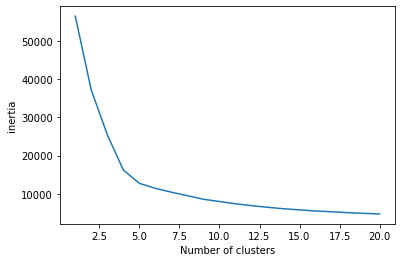

In [535]:
%matplotlib inline
plt.plot(range(1, 21), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()
    

In [434]:
### euclidean kmeans
from sklearn.manifold import MDS

embedding = MDS(n_components=16)
euclidean_concepts = embedding.fit_transform(original_embeddings)
euclidean_concepts.shape


(1854, 16)

In [435]:
inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i).fit(euclidean_concepts)
    inertia.append(kmeans.inertia_)
print(inertia)

[8273.55085841339, 7006.395980264492, 6264.664830006343, 5724.569165299763, 5365.786931321035, 5079.528475887038, 4816.174770827472, 4610.742523592434, 4446.53391007076, 4283.088210751787, 4151.146801798104, 4030.5464063358954, 3934.403892463961, 3840.2689673337372, 3762.4621738132864, 3707.570871216027, 3624.316669338574, 3580.5613352195455, 3527.5208733176955, 3462.9118911123232]


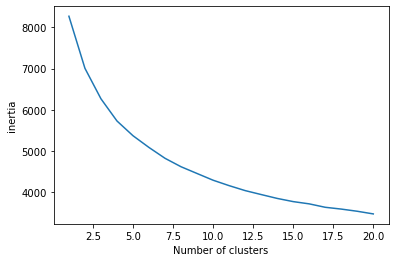

In [436]:
%matplotlib inline
plt.plot(range(1, 21), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

<IPython.core.display.Javascript object>


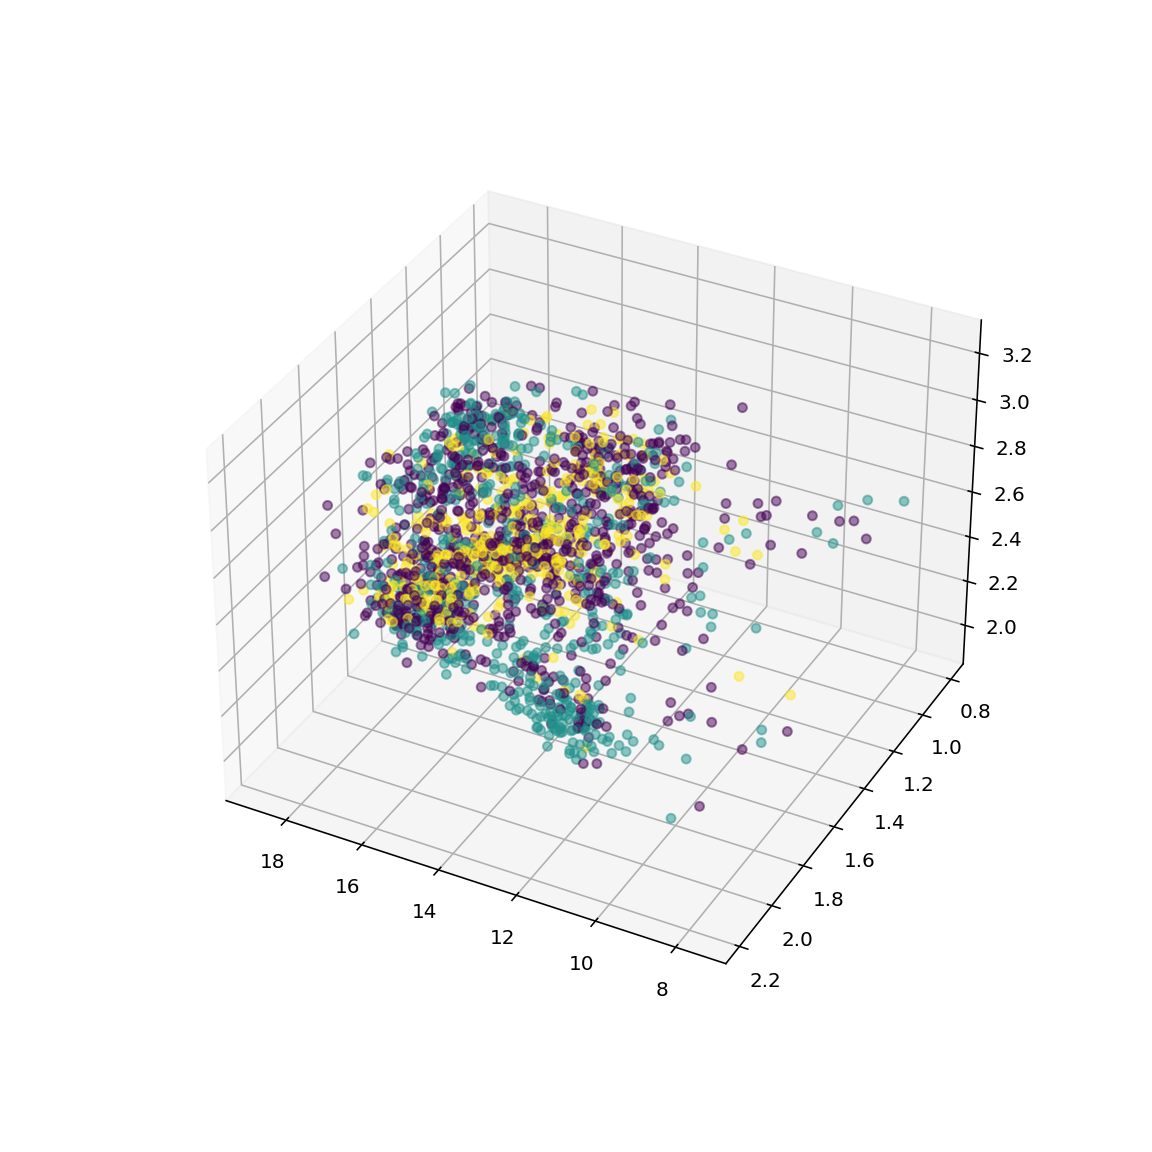

In [564]:
### cluster by memorability and plot polar coordinates
kmeans = KMeans(n_clusters=3, random_state=42).fit(mean_concept_in_feat_cat[['cr']])
labels = kmeans.labels_
kmeans.cluster_centers_

%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(polar_coord['r'], polar_coord['theta'], polar_coord['rho'], c=labels, alpha=0.5)



## Map 49 features to 1854-dim concept space

In [161]:
concept_embeddings = np.load('../concept_embeddings.npy')
concept_embeddings[:3, :, 0]

array([[-12.85767637,   5.80114418,  -2.89601182],
       [  1.80445771,   3.40501136,  13.87479117],
       [ -1.40824676,   8.43838496,  11.58319905]])

In [207]:
original_embeddings.shape

(1854, 49)

In [208]:
feature_in_con_coord = []

normalized_embeddings = original_embeddings/original_embeddings.sum(axis=0)
normalized_embeddings = (original_embeddings/np.sqrt((original_embeddings**2).sum(axis=0)))

for layer in range(concept_embeddings.shape[-1]):
    feature_in_con_coord.append(normalized_embeddings.T@concept_embeddings[:,:,layer])
np.array(feature_in_con_coord).shape

(500, 49, 3)

In [209]:
np.array(feature_in_con_coord)[0,:3,:]

array([[-29.90852278,  38.99174517, 114.49786727],
       [-89.42954405,  78.50624903, 105.33167553],
       [-64.94900453,  84.82041561,  80.74720587]])

In [210]:
feature_in_con_radius = np.sqrt((np.array(feature_in_con_coord)**2).sum(2))
feature_in_con_radius.shape

(500, 49)

In [211]:
mean_feature_in_con_radius = np.mean(feature_in_con_radius, axis=0)
mean_feature_in_con_radius

array([ 96.51555625, 109.37614146, 110.60339497,  55.2115481 ,
        73.14849008,  83.1041501 ,  75.72920149,  64.77646094,
        78.79911808,  54.20027264,  66.27055503,  70.19319434,
        65.94584358,  68.76587166,  67.94616916,  64.2750802 ,
        75.59685885,  63.66595415,  60.67213445,  67.70461711,
        62.92201438,  71.94646989,  59.51817635,  53.99357263,
        58.64544055,  62.67161741,  57.50640893,  53.20225037,
        53.01368185,  61.40867771,  61.81643075,  59.72427614,
        56.12095183,  50.52128078,  60.97650727,  50.54557587,
        55.49281622,  53.73348121,  58.21318255,  48.95841621,
        36.45962062,  53.41295134,  51.35803296,  51.68461168,
        49.54208145,  46.86283911,  45.0801767 ,  47.5160487 ,
        51.32247271])

<IPython.core.display.Javascript object>


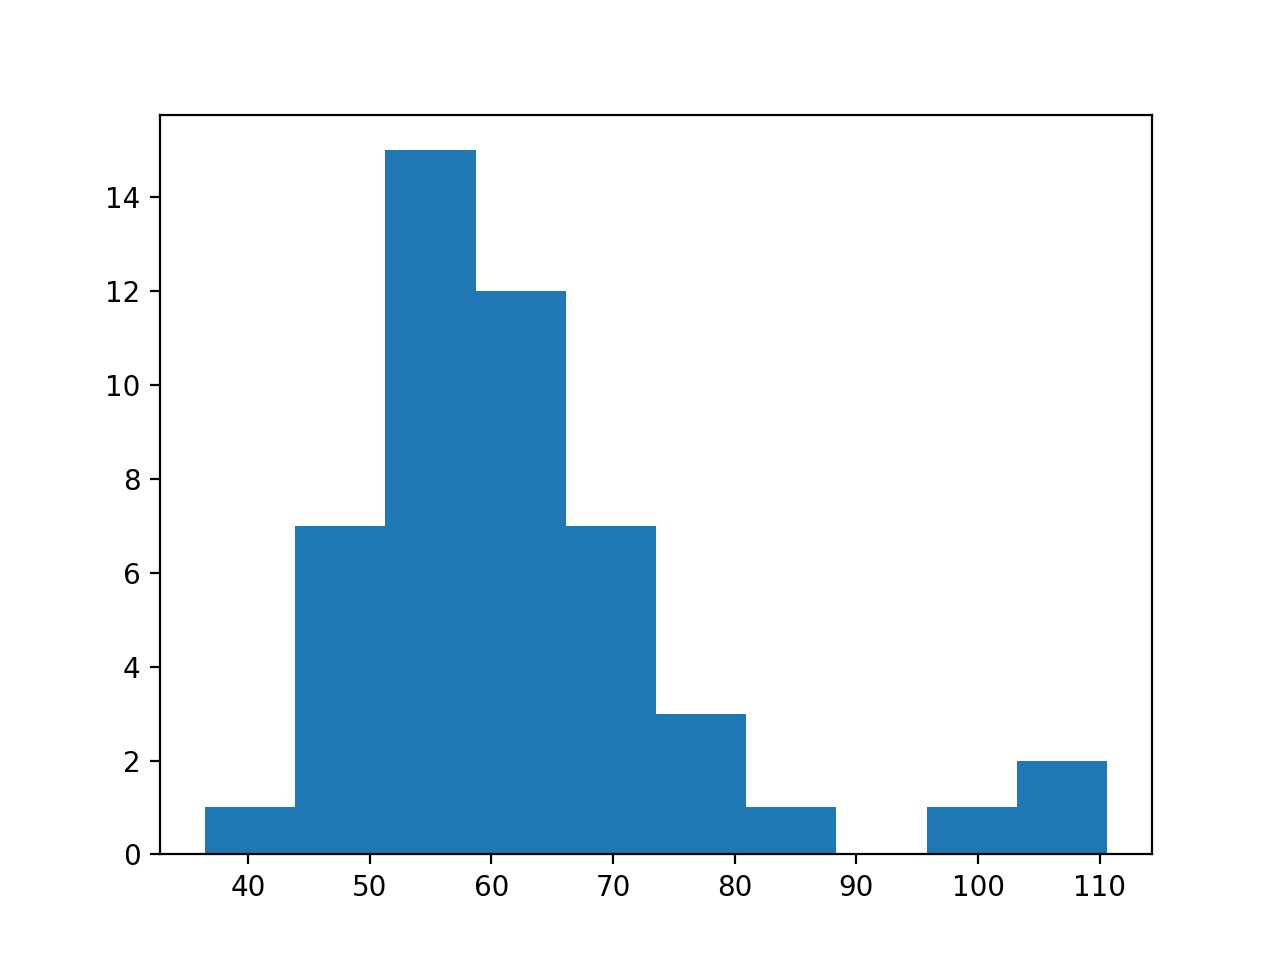

(array([ 1.,  7., 15., 12.,  7.,  3.,  1.,  0.,  1.,  2.]),
 array([ 36.45962062,  43.87399806,  51.28837549,  58.70275293,
         66.11713036,  73.5315078 ,  80.94588523,  88.36026266,
         95.7746401 , 103.18901753, 110.60339497]),
 <BarContainer object of 10 artists>)

In [212]:
%matplotlib notebook
plt.hist(mean_feature_in_con_radius)

#### visualize 49 features in 1854-dim concept space

In [213]:
# concept_coordinates vs. feature_embeddings
np.array(feature_in_con_coord).shape
np.array(feature_in_con_coord)[0,:3, :]

array([[-29.90852278,  38.99174517, 114.49786727],
       [-89.42954405,  78.50624903, 105.33167553],
       [-64.94900453,  84.82041561,  80.74720587]])

In [214]:
np.array(concept_embeddings).shape

(1854, 3, 500)

In [215]:
# feature in concept

feature_in_con_reference = feature_in_con_coord[0]
feature_in_con_output = [feature_in_con_reference]
for i in range(1, len(feature_in_con_coord)):
    R, scale = orthogonal_procrustes(feature_in_con_coord[i], feature_in_con_reference)
#     print(rotated)
    feature_in_con_output.append(feature_in_con_coord[i]@R)
np.array(feature_in_con_output).shape

(500, 49, 3)

In [216]:
# concept embeddings

concept_embed_reference = concept_embeddings[:,:,0]
concept_embed_output = [concept_embed_reference]
for i in range(1, concept_embeddings.shape[-1]):
    R, scale = orthogonal_procrustes(concept_embeddings[:,:,i], concept_embed_reference)
#     print(rotated)
    concept_embed_output.append(concept_embeddings[:,:,i]@R)

In [217]:
mean_concept_embed = np.array(concept_embed_output).mean(0)
mean_feature_in_con = np.array(feature_in_con_output).mean(0)

In [218]:
mean_concept_embed_cat = pd.DataFrame(mean_concept_embed).reset_index().merge(cat_concept_mem, how='left', left_on='index', right_index=True)
mean_concept_embed_cat


index         0         1         2        cr  bigcat  \
0         0 -4.029332  6.294581  5.664737  0.779739       1   
1         1  0.142924 -2.099986  5.701960  0.798485      13   
2         2 -6.043293  3.402867  7.217851  0.752845      18   
3         3 -7.432822 -1.540647 -2.249605  0.761851      99   
4         4  0.503087  0.509083 -2.116812  0.794466       9   
...     ...       ...       ...       ...       ...     ...   
1849   1849 -3.489616  5.185498  2.806166  0.722655      99   
1850   1850 -3.590019  5.546754  2.368323  0.843158      10   
1851   1851 -3.227736  4.417548  2.047137  0.800163       1   
1852   1852 -2.005057  2.945221  1.400453  0.797468      99   
1853   1853 -5.043448  7.761002  3.294535  0.823237      10   

                cat_name  
0                 animal  
1             home decor  
2     musical instrument  
3                    NaN  
4      electronic device  
...                  ...  
1849                 NaN  
1850                food  
1851              animal  
1852                 NaN  
1853                food  

[1854 rows x 7 columns]

In [219]:
mean_concept_embed_cat_na = mean_concept_embed_cat.dropna()
mean_concept_embed_cat_na

index         0         1         2        cr  bigcat  \
0         0 -4.029332  6.294581  5.664737  0.779739       1   
1         1  0.142924 -2.099986  5.701960  0.798485      13   
2         2 -6.043293  3.402867  7.217851  0.752845      18   
4         4  0.503087  0.509083 -2.116812  0.794466       9   
5         5 -3.464581 -1.301132  1.282350  0.806000      12   
...     ...       ...       ...       ...       ...     ...   
1847   1847 -2.880281  4.632323  1.709697  0.803129      24   
1848   1848 -3.033579  4.861323 -0.478823  0.765881      10   
1850   1850 -3.590019  5.546754  2.368323  0.843158      10   
1851   1851 -3.227736  4.417548  2.047137  0.800163       1   
1853   1853 -5.043448  7.761002  3.294535  0.823237      10   

                cat_name  
0                 animal  
1             home decor  
2     musical instrument  
4      electronic device  
5              furniture  
...                  ...  
1847                 toy  
1848                food  
1850                food  
1851              animal  
1853                food  

[1324 rows x 7 columns]

<IPython.core.display.Javascript object>


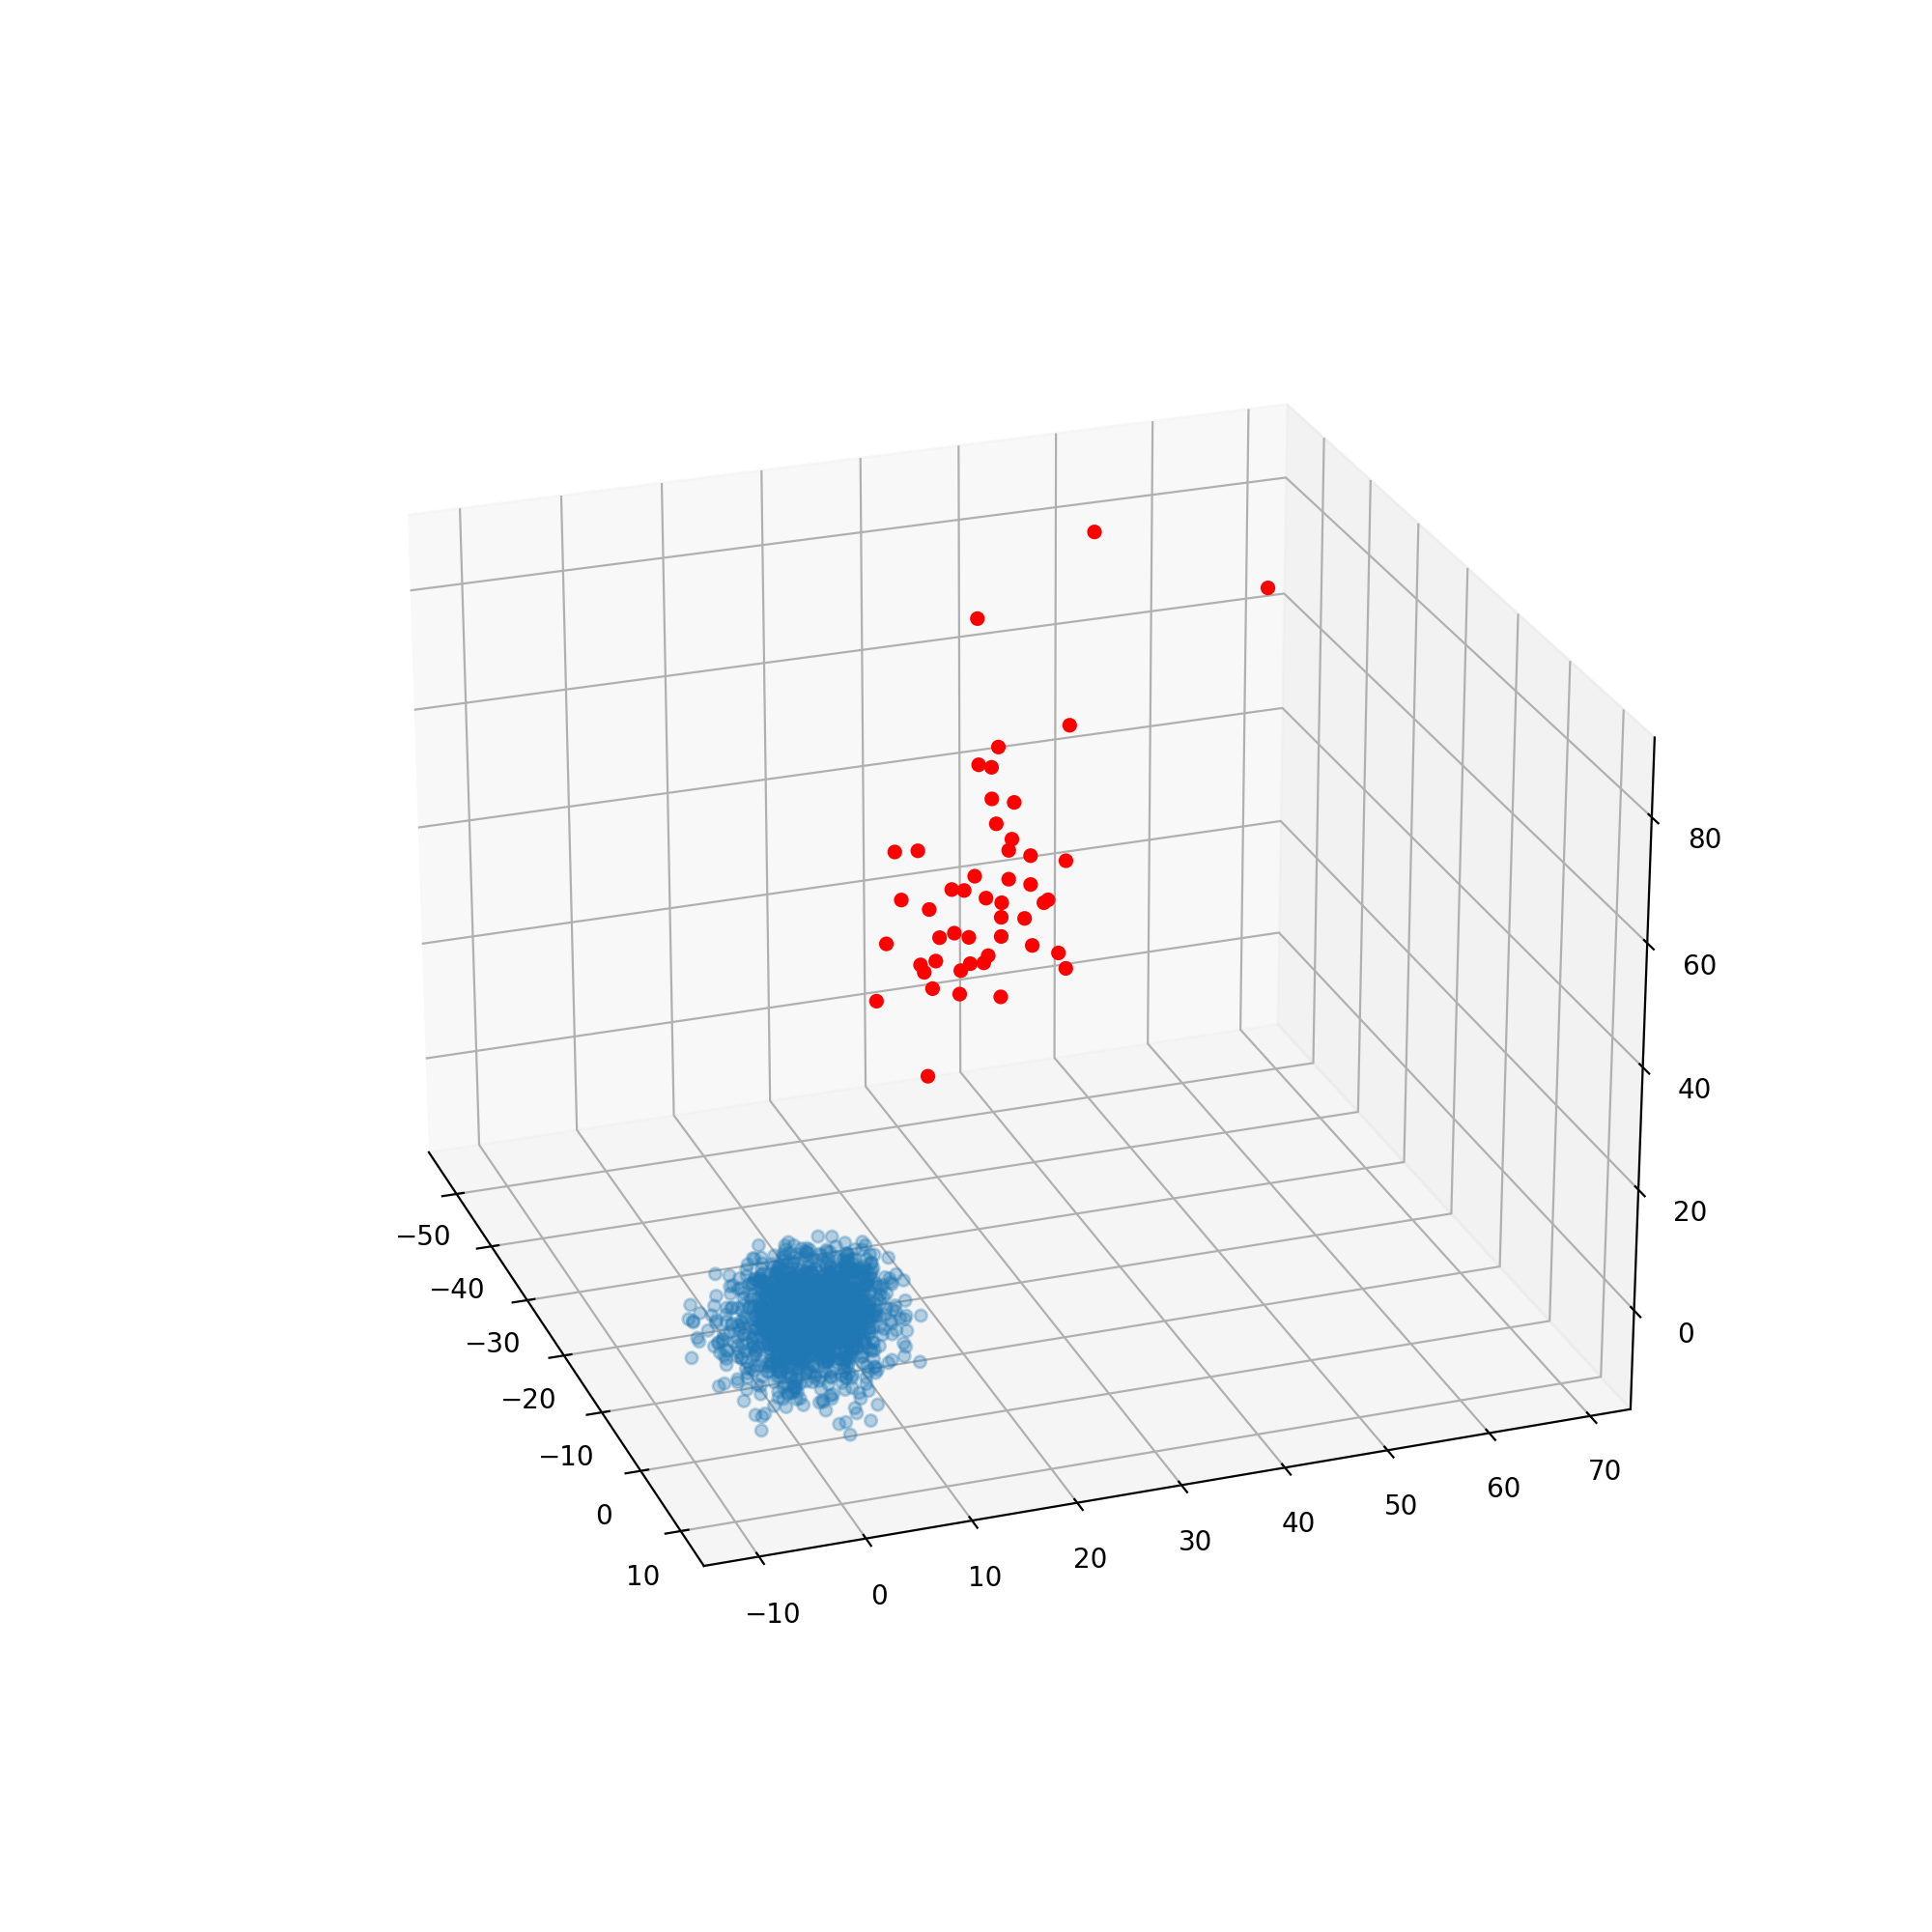

In [220]:
### features in concept space, concept space embeddings (with categories)

%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(mean_feature_in_con.T[0], mean_feature_in_con.T[1], mean_feature_in_con.T[2], color='red', alpha=1)
concept_space = ax.scatter(mean_concept_embed_cat_na[0], mean_concept_embed_cat_na[1], mean_concept_embed_cat_na[2], alpha=0.3)
#                            , c=mean_concept_embed_cat_na['bigcat'], cmap=cmap)
# plt.colorbar(concept_space)
plt.show()


<IPython.core.display.Javascript object>


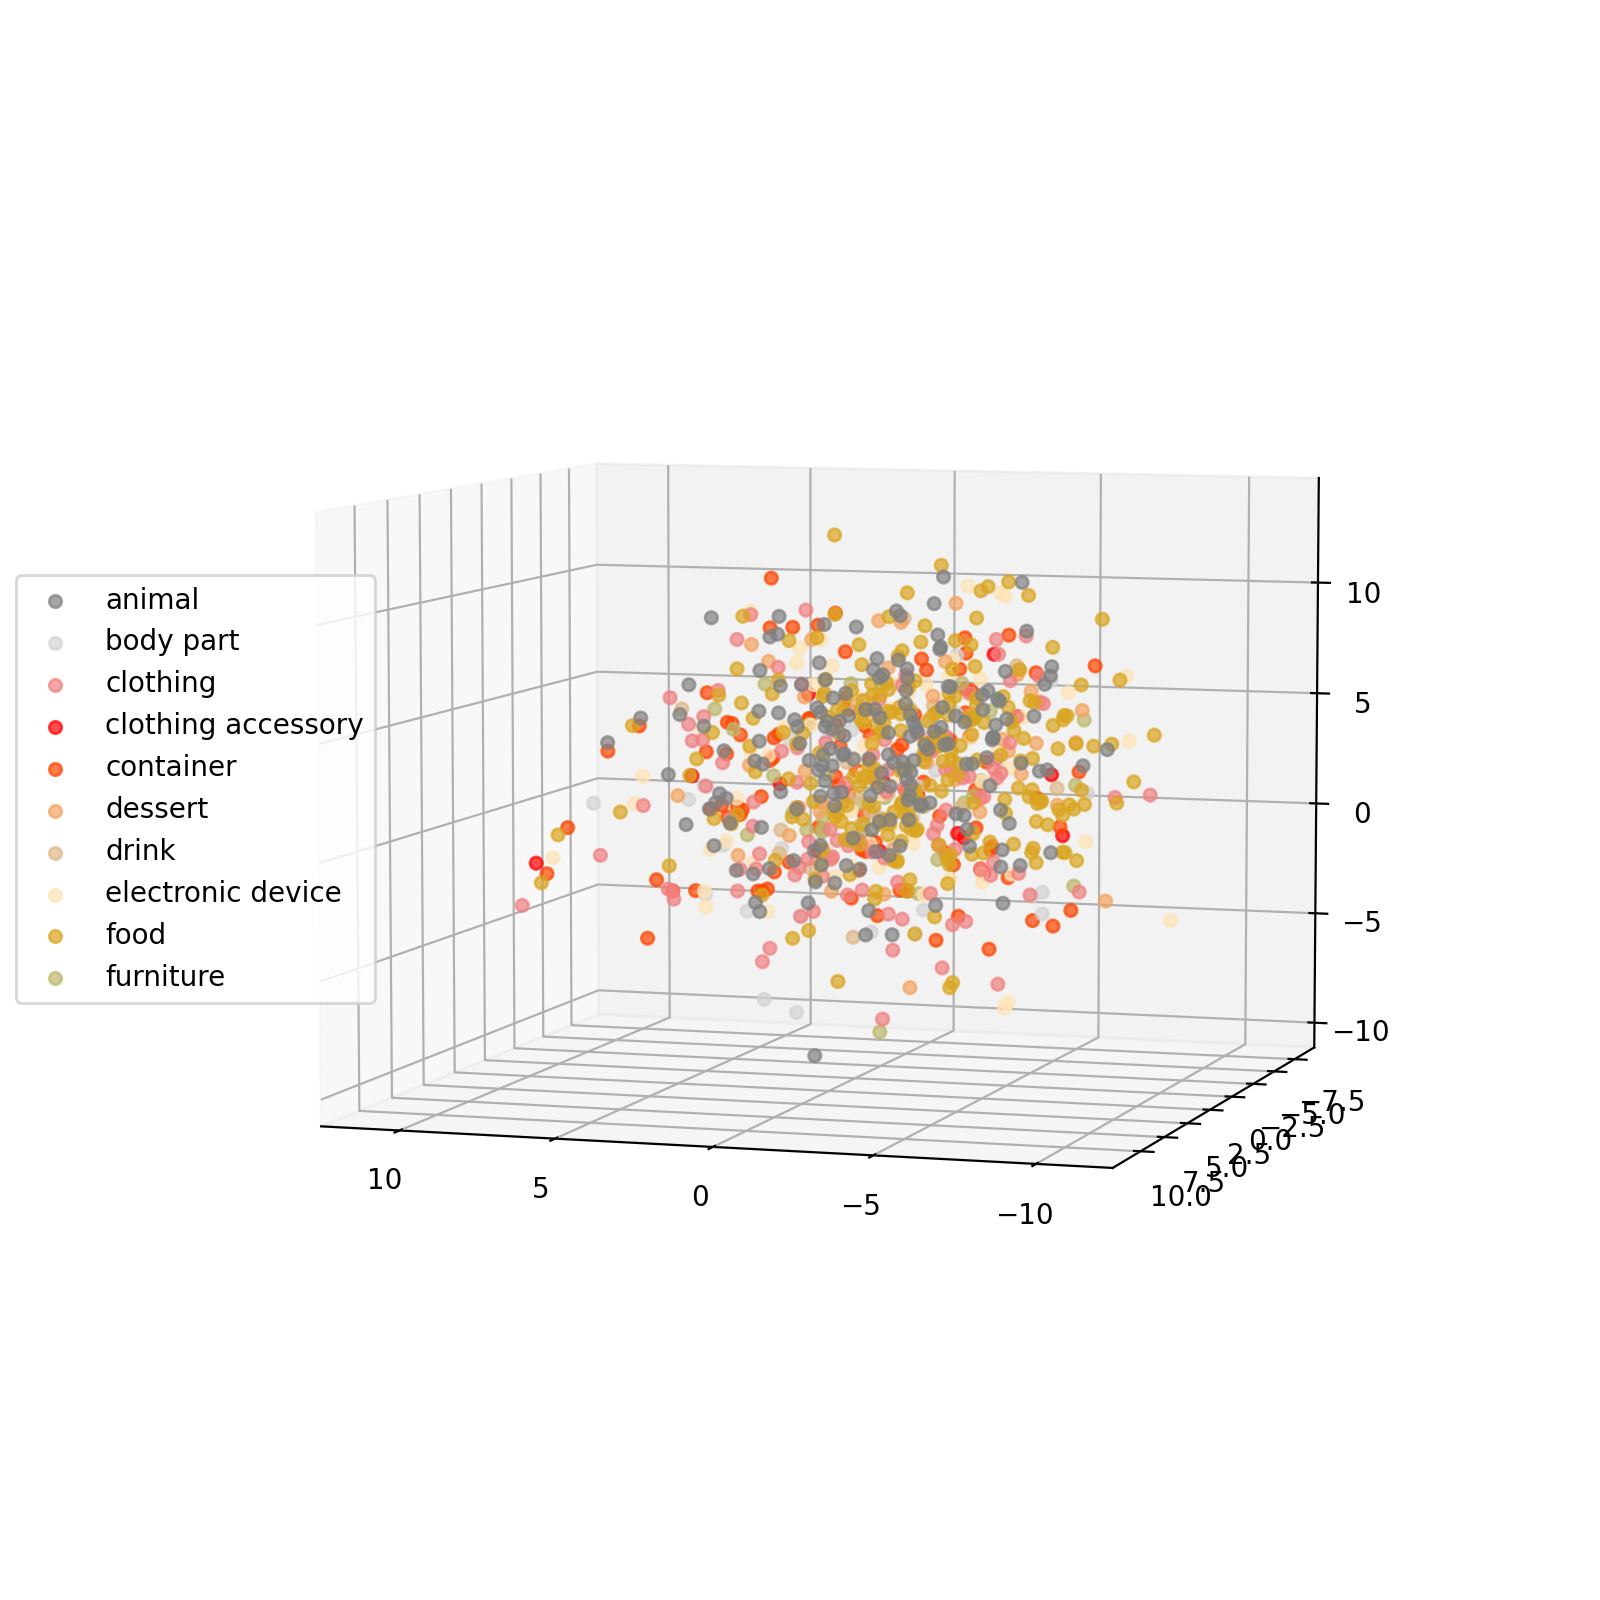

In [419]:
### color by category: repeat color assignment
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

groups = mean_concept_embed_cat_na.groupby("cat_name")
i = 3
for name, group in groups:
    ax.scatter(group[0], group[1], group[2], label=name, alpha=0.7, color=color_names[i])
    i = i+6
    if i > 60:
        break
plt.legend(bbox_to_anchor=(0.15,0.7))
# ax.scatter(mean_feature_in_concept.T[0], mean_feature_in_concept.T[1], mean_feature_in_concept.T[2], color='red', alpha=1)


<IPython.core.display.Javascript object>


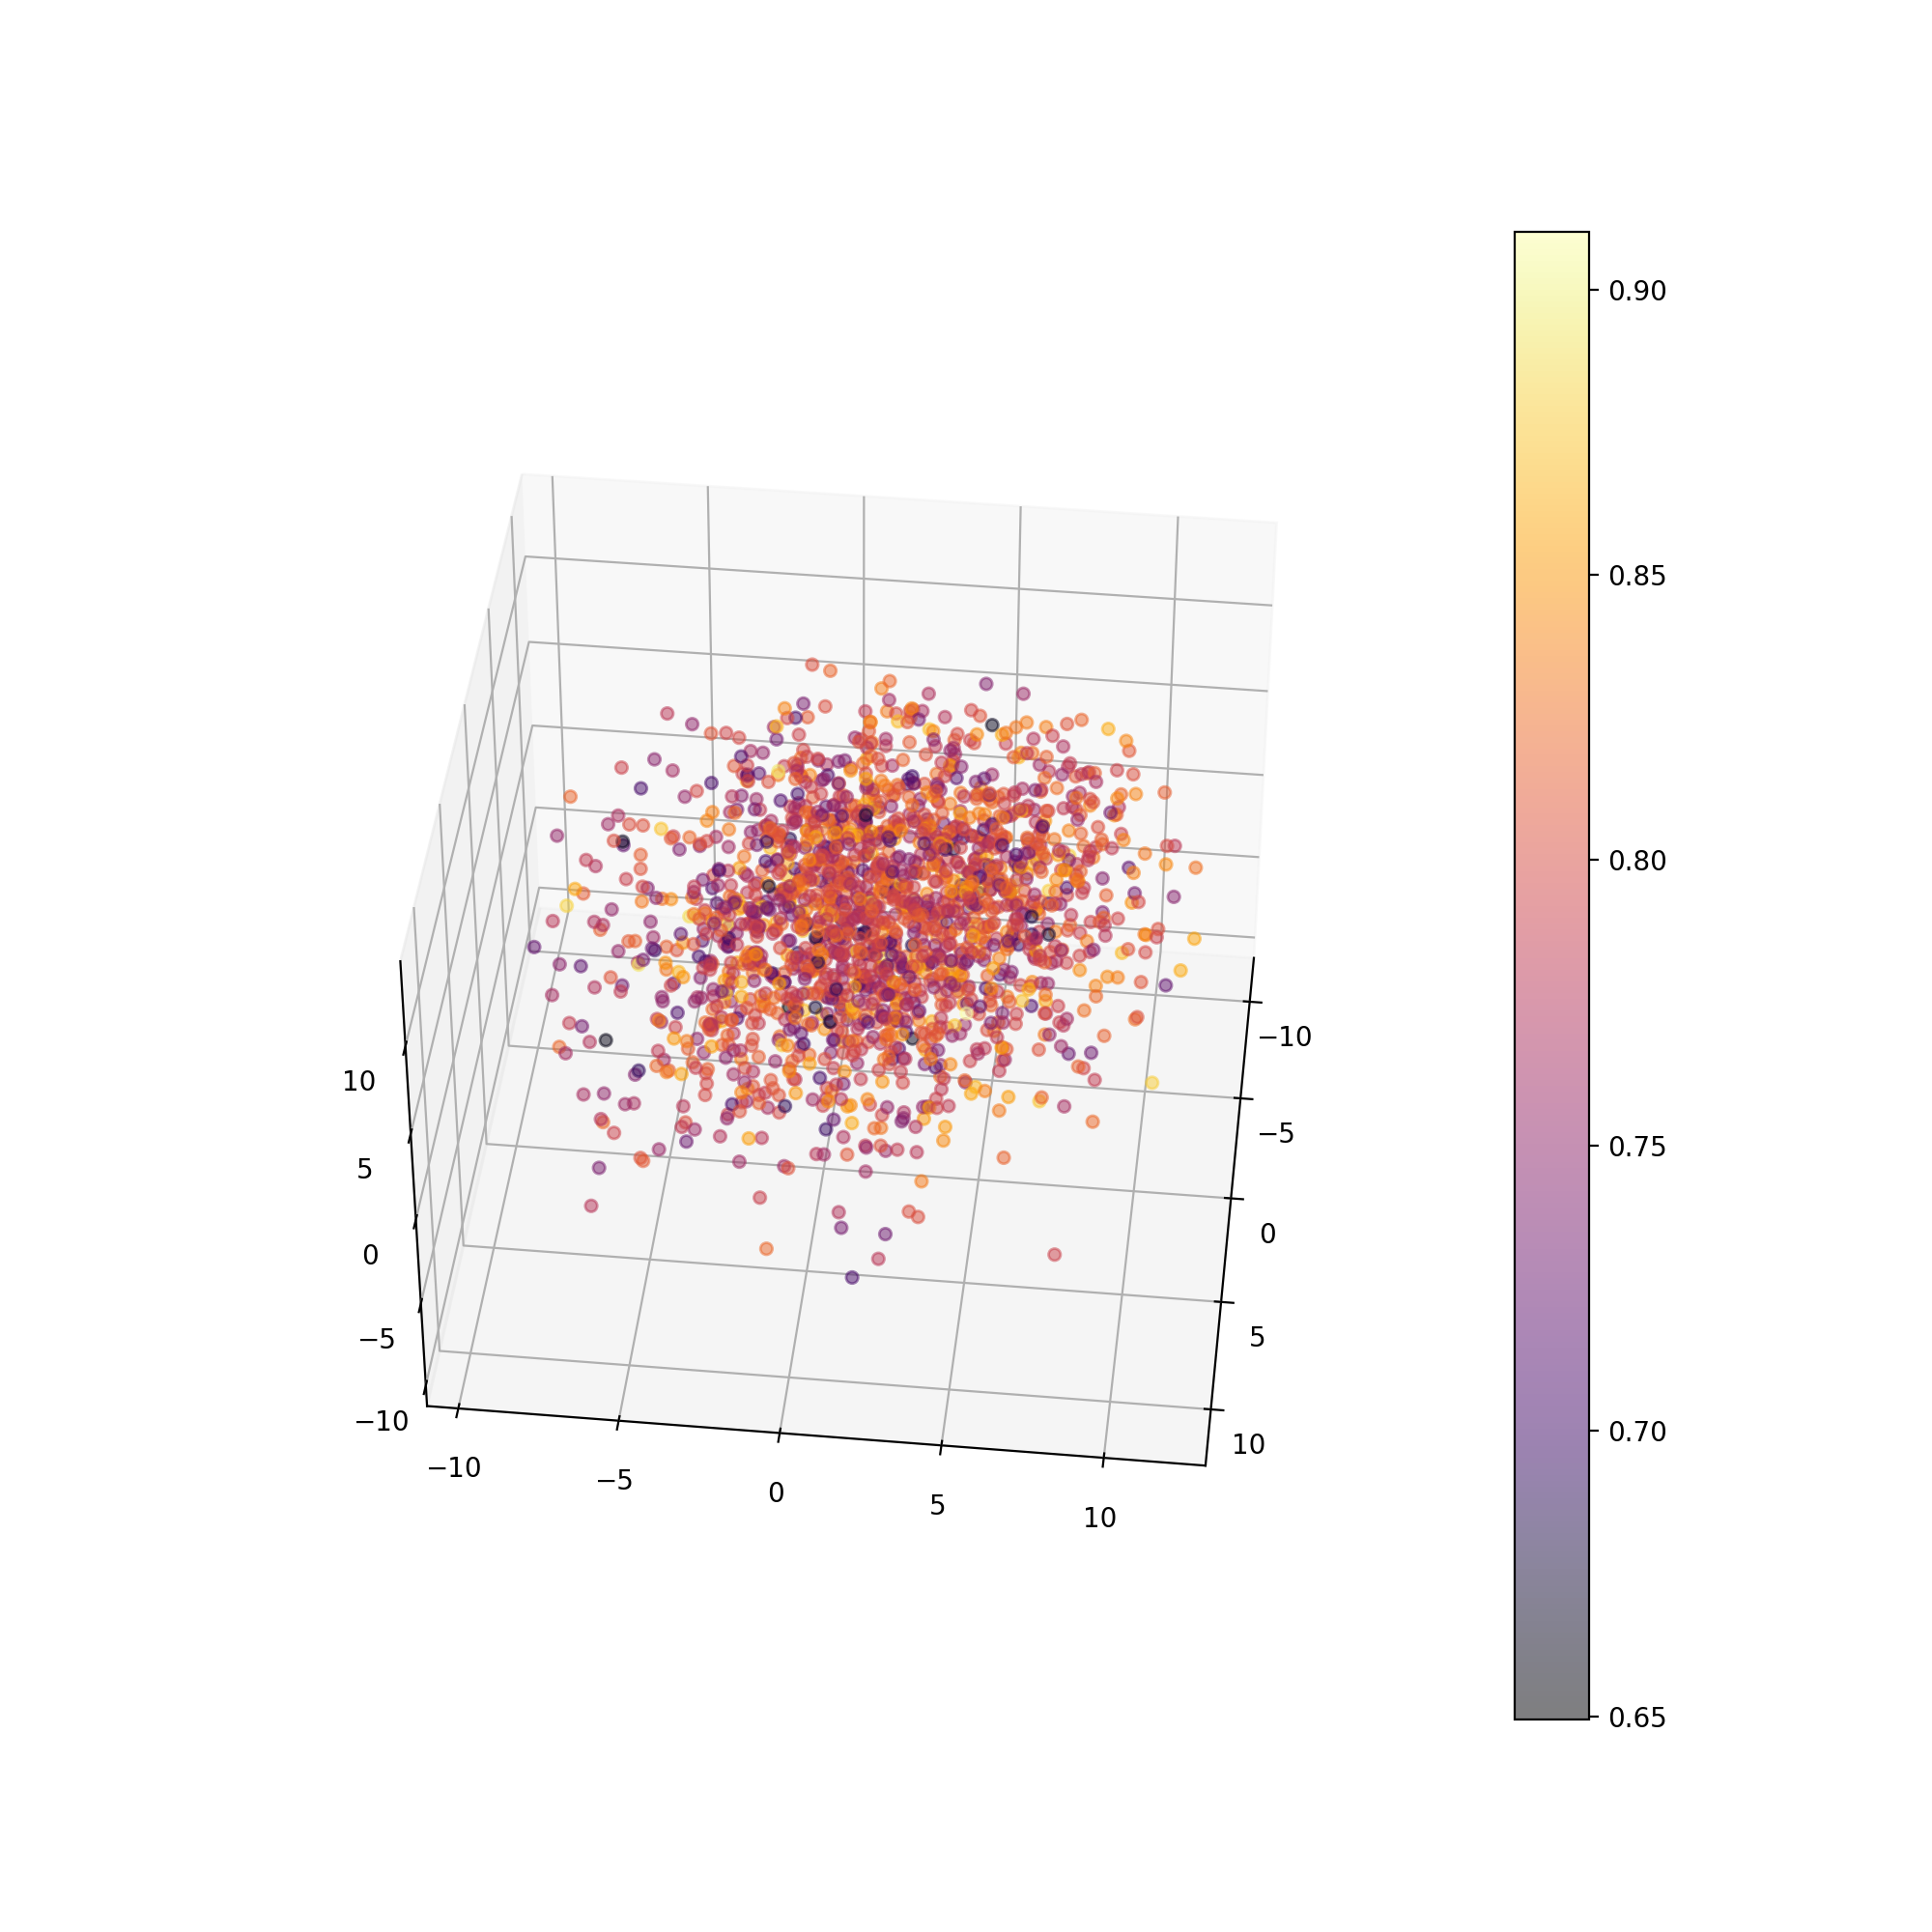

In [222]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# ax.scatter(mean_feature_in_concept.T[0], mean_feature_in_concept.T[1], mean_feature_in_concept.T[2], color='red', alpha=1)
concept_space = ax.scatter(mean_concept_embed_cat[0], mean_concept_embed_cat[1], mean_concept_embed_cat[2], c=mean_concept_embed_cat['cr'], cmap='inferno', alpha=0.5)
# plt.legend(cat_names['cat_name'])
plt.colorbar(concept_space)
plt.show()


<IPython.core.display.Javascript object>


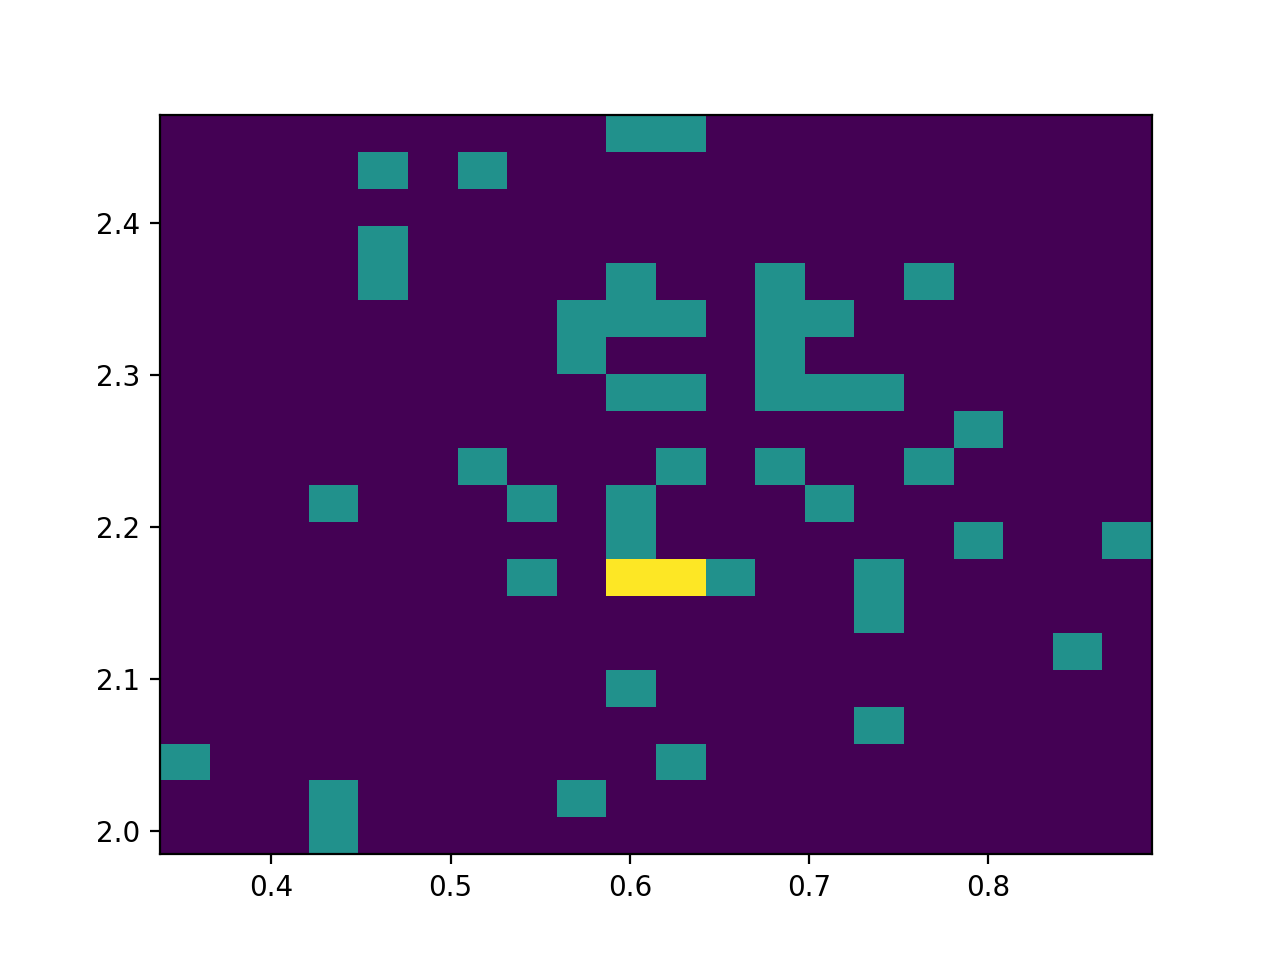

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 2., 1., 1., 0., 0., 1., 0., 1., 1.,
         0., 0., 0., 1.],
        [0

In [223]:
%matplotlib notebook

plt.clf()
x=np.sqrt((np.array(concept_embed_output)**2).sum(2)).mean(axis=1)
y=np.sqrt((np.array(feature_in_con_output)**2).sum(1)).mean(axis=1)

from scipy.stats import spearmanr
spearmanr(x,y)

from hyperbolicMDS.mds import HyperMDS, cart_to_polar
from matplotlib import colors
r, theta, rho = cart_to_polar(mean_feature_in_con).T
plt.hist2d(theta, rho,
           bins = 20)
#            cmap = "RdYlGn_r",
#            norm = colors.LogNorm())

# cartesian to polar: clustering at certain angle in concpt embeddings? --> histrogram of angle